# Import

In [1]:
import numpy as np
import pandas as pd 
import hiive.mdptoolbox 
import hiive.mdptoolbox.mdp
import hiive.mdptoolbox.example
import mdptoolbox, mdptoolbox.example
import gym
import matplotlib.pyplot as plt
import time
import math
import random
import graphviz

from typing import Tuple
from sklearn.preprocessing import KBinsDiscretizer

# Forest Management (simple)

In [2]:
P, R = hiive.mdptoolbox.example.forest(S=2000, p=0.01)
st = time.time()
fm_q_mdp = hiive.mdptoolbox.mdp.QLearning(P, R, 0.999, epsilon=0.1,epsilon_decay=0.95, n_iter=100000, alpha=0.95, skip_check=True)
fm_q_mdp.run()
end = time.time()
end-st

9.958841800689697

## Nombre d'itérations pour converger

In [3]:
P, R = hiive.mdptoolbox.example.forest(S=5)

fm_pim = hiive.mdptoolbox.mdp.PolicyIteration(P, R, gamma = 0.99,
                                              max_iter = 1000)
fm_pim.run()

[{'State': None,
  'Action': None,
  'Reward': 79.49242913074471,
  'Error': 27.845681378232996,
  'Time': 0.00299835205078125,
  'Max V': 79.49242913074471,
  'Mean V': 53.9101198822038,
  'Iteration': 1},
 {'State': None,
  'Action': None,
  'Reward': 79.49242913074468,
  'Error': 24.28168137823303,
  'Time': 0.00299835205078125,
  'Max V': 79.49242913074468,
  'Mean V': 59.479256157850344,
  'Iteration': 2},
 {'State': None,
  'Action': None,
  'Reward': 79.49242913074468,
  'Error': 21.106157378232908,
  'Time': 0.003998279571533203,
  'Max V': 79.49242913074468,
  'Mean V': 64.335592433497,
  'Iteration': 3},
 {'State': None,
  'Action': None,
  'Reward': 265.6677327484001,
  'Error': 2.842170943040401e-14,
  'Time': 0.003998279571533203,
  'Max V': 265.6677327484001,
  'Mean V': 258.4932447716001,
  'Iteration': 4}]

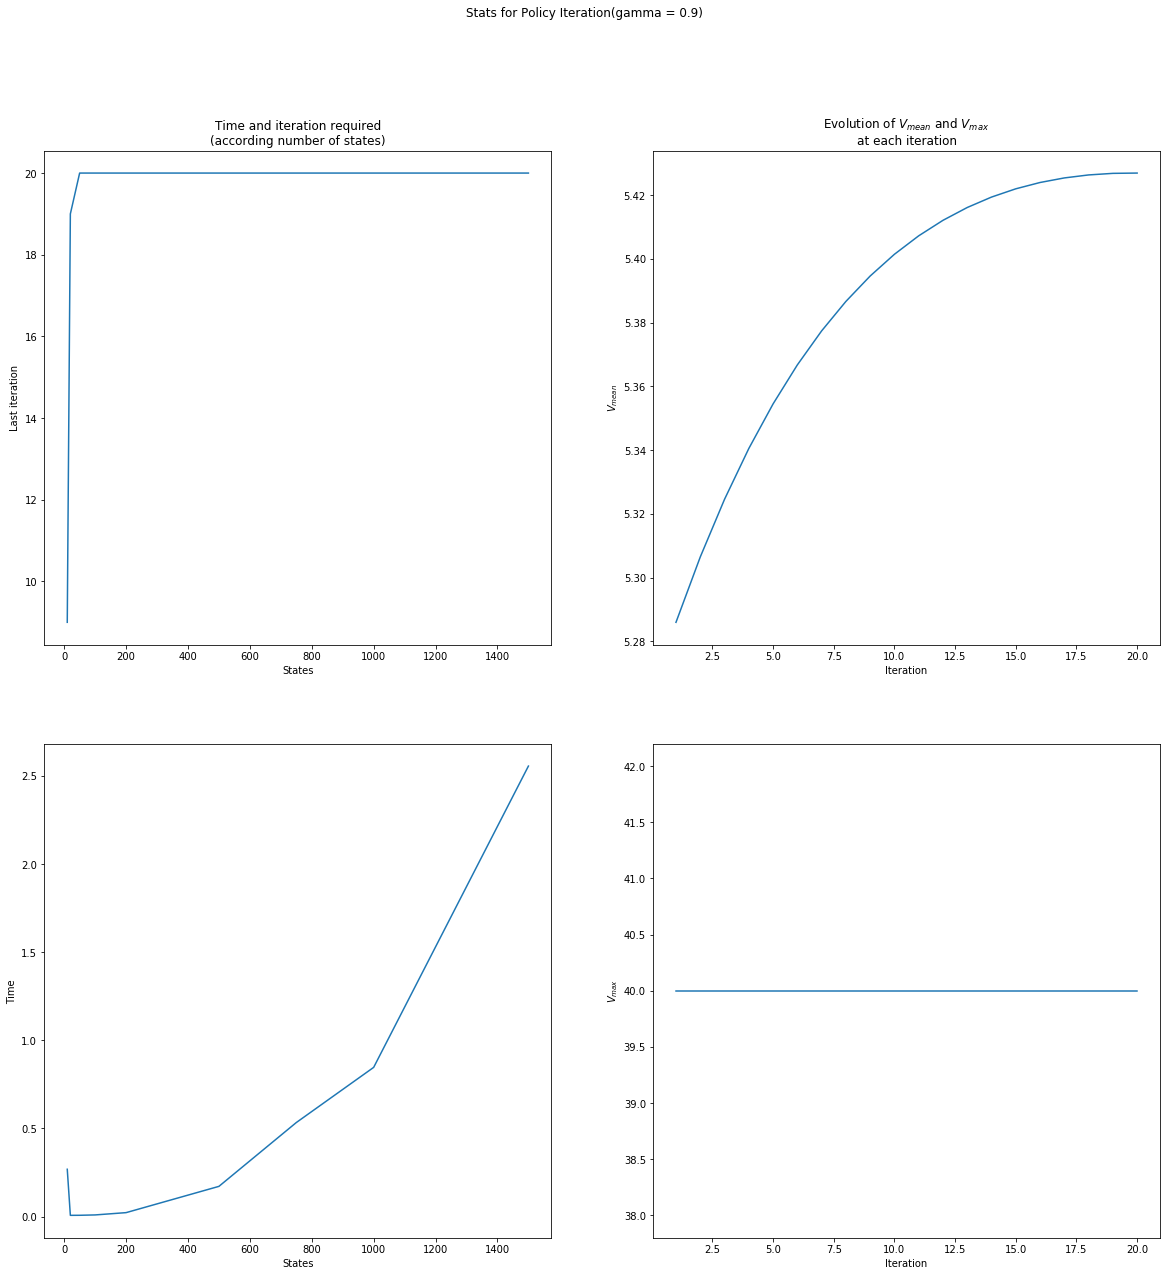

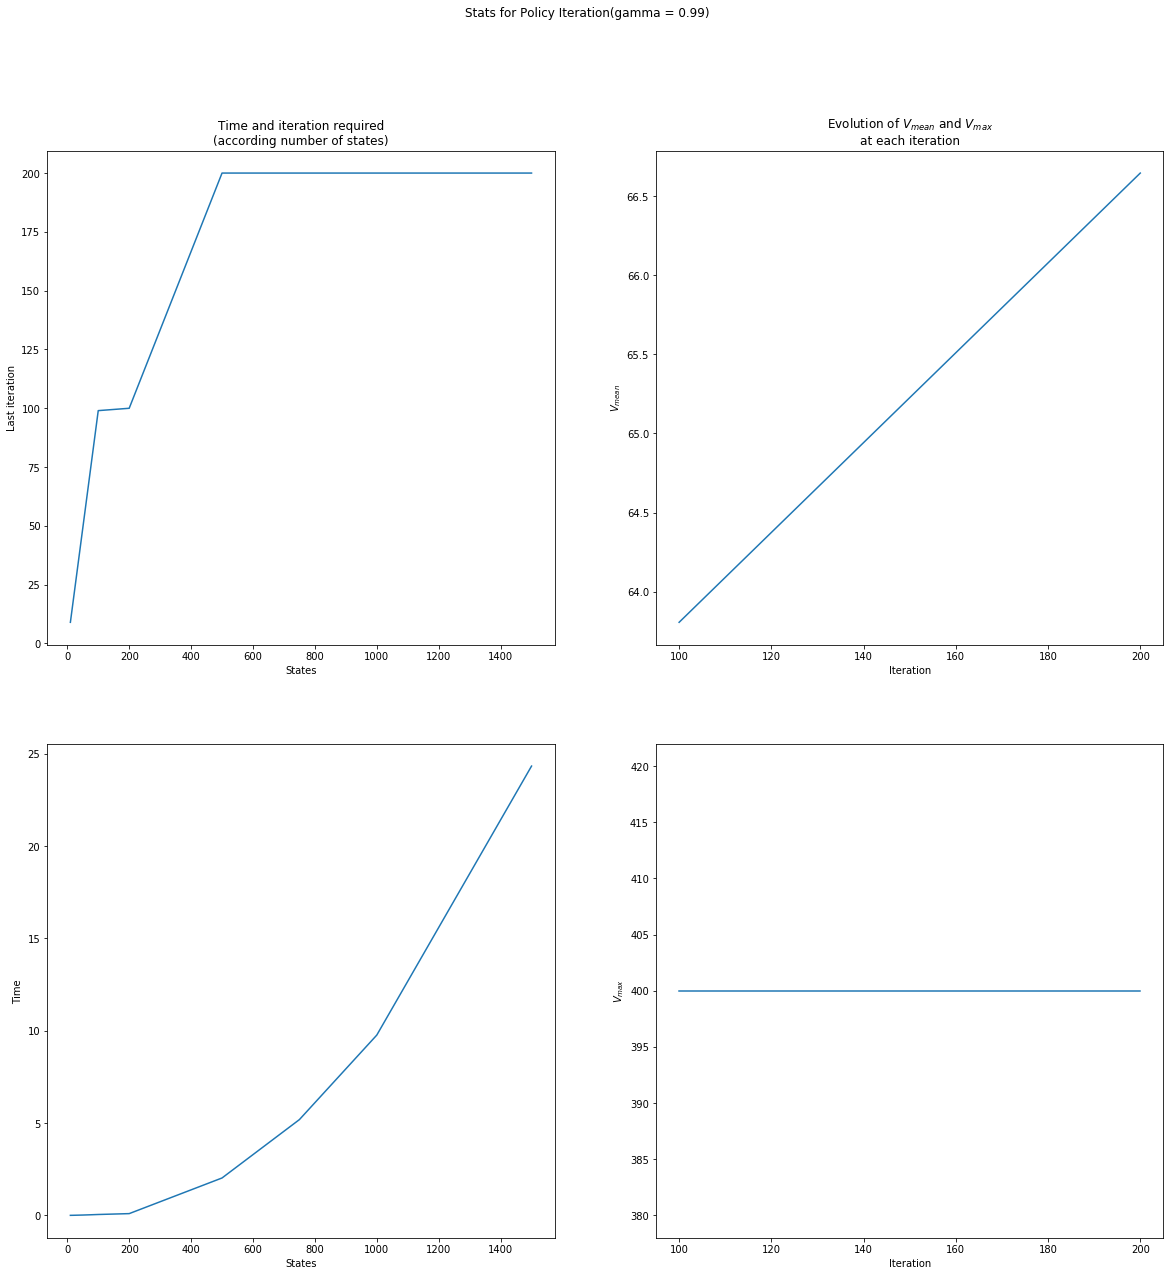

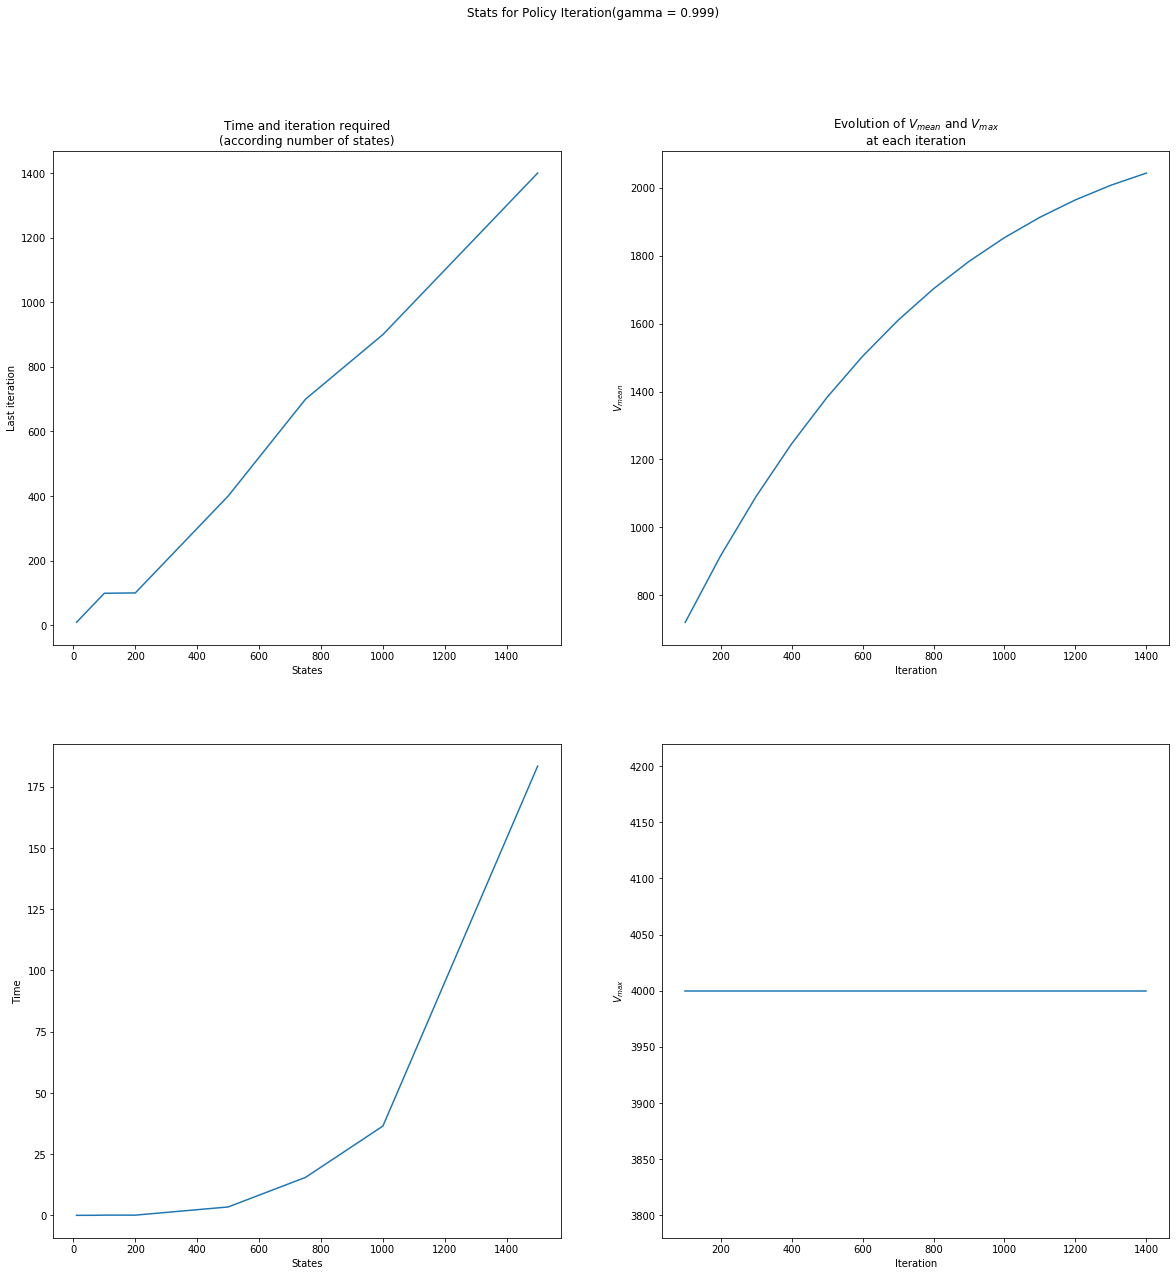

In [4]:
nb_states = [10, 20, 50, 75, 100, 200, 500, 750, 1000, 1500]
gamma = [0.9, 0.99, 0.999]

for g in gamma:
    last_nb = list()
    last_time = list()
    last_moyv = list()
    last_maxv = list()
    itera = list()
    for s in nb_states:
        P, R = hiive.mdptoolbox.example.forest(S=s, p = int(2/s))
        fm_pim = hiive.mdptoolbox.mdp.PolicyIteration(P, R, gamma = g,
                                              max_iter = 1000000)
        fm_pim.run()
        stat = fm_pim.run_stats
        last_nb.append(stat[-1]['Iteration'])
        last_time.append(stat[-1]['Time'])
    
    for k in range(len(stat)):
        last_moyv.append(stat[k]['Mean V'])
        last_maxv.append(stat[k]['Max V'])
        itera.append(stat[k]['Iteration'])
    
    fig, ax = plt.subplots(2, 2, figsize = (20, 20))
    title = "Stats for Policy Iteration(gamma = {})".format(g)
    fig.suptitle(title)
    
    ax[0, 0].plot(nb_states, last_nb)
    ax[0, 0].set_title("Time and iteration required\n(according number of states)")
    ax[0, 0].set_xlabel("States")
    ax[0, 0].set_ylabel("Last iteration")
    ax[1, 0].plot(nb_states, last_time)
    ax[1, 0].set_xlabel("States")
    ax[1, 0].set_ylabel("Time")
    
    ax[0, 1].plot(itera, last_moyv)
    ax[0, 1].set_title(r"Evolution of $V_{mean}$ and $V_{max}$"+"\nat each iteration")
    ax[0, 1].set_xlabel("Iteration")
    ax[0, 1].set_ylabel(r"$V_{mean}$")
    ax[1, 1].plot(itera, last_maxv)
    ax[1, 1].set_xlabel("Iteration")
    ax[1, 1].set_ylabel(r"$V_{max}$")
    
    filename = "PI_FM_" + str(g)+".png"
    plt.savefig(filename)

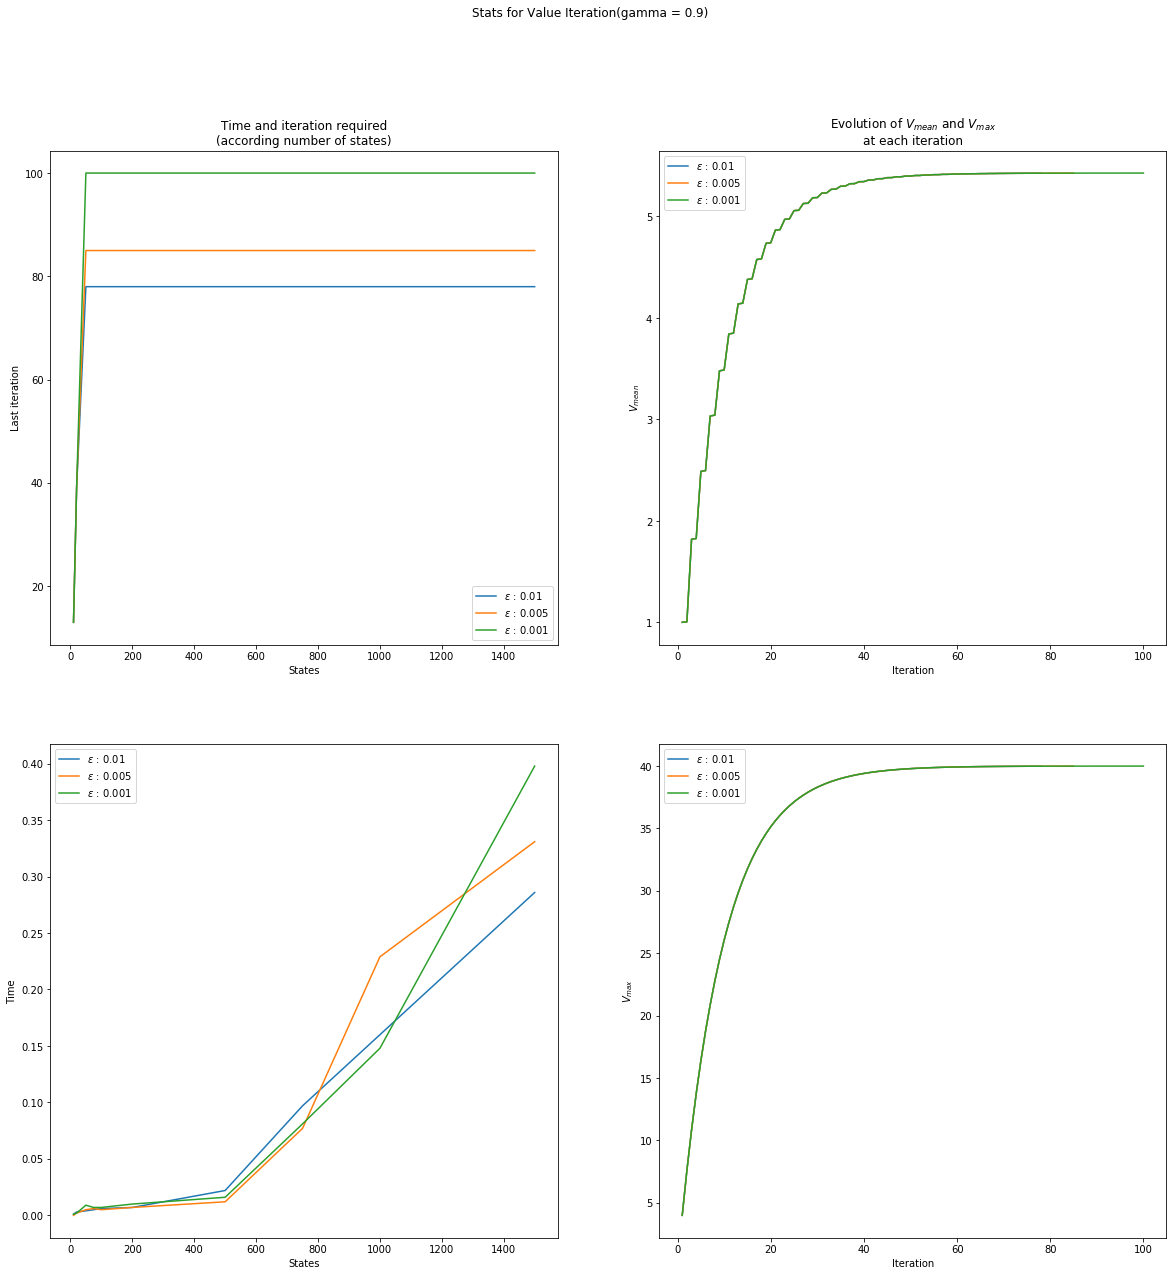

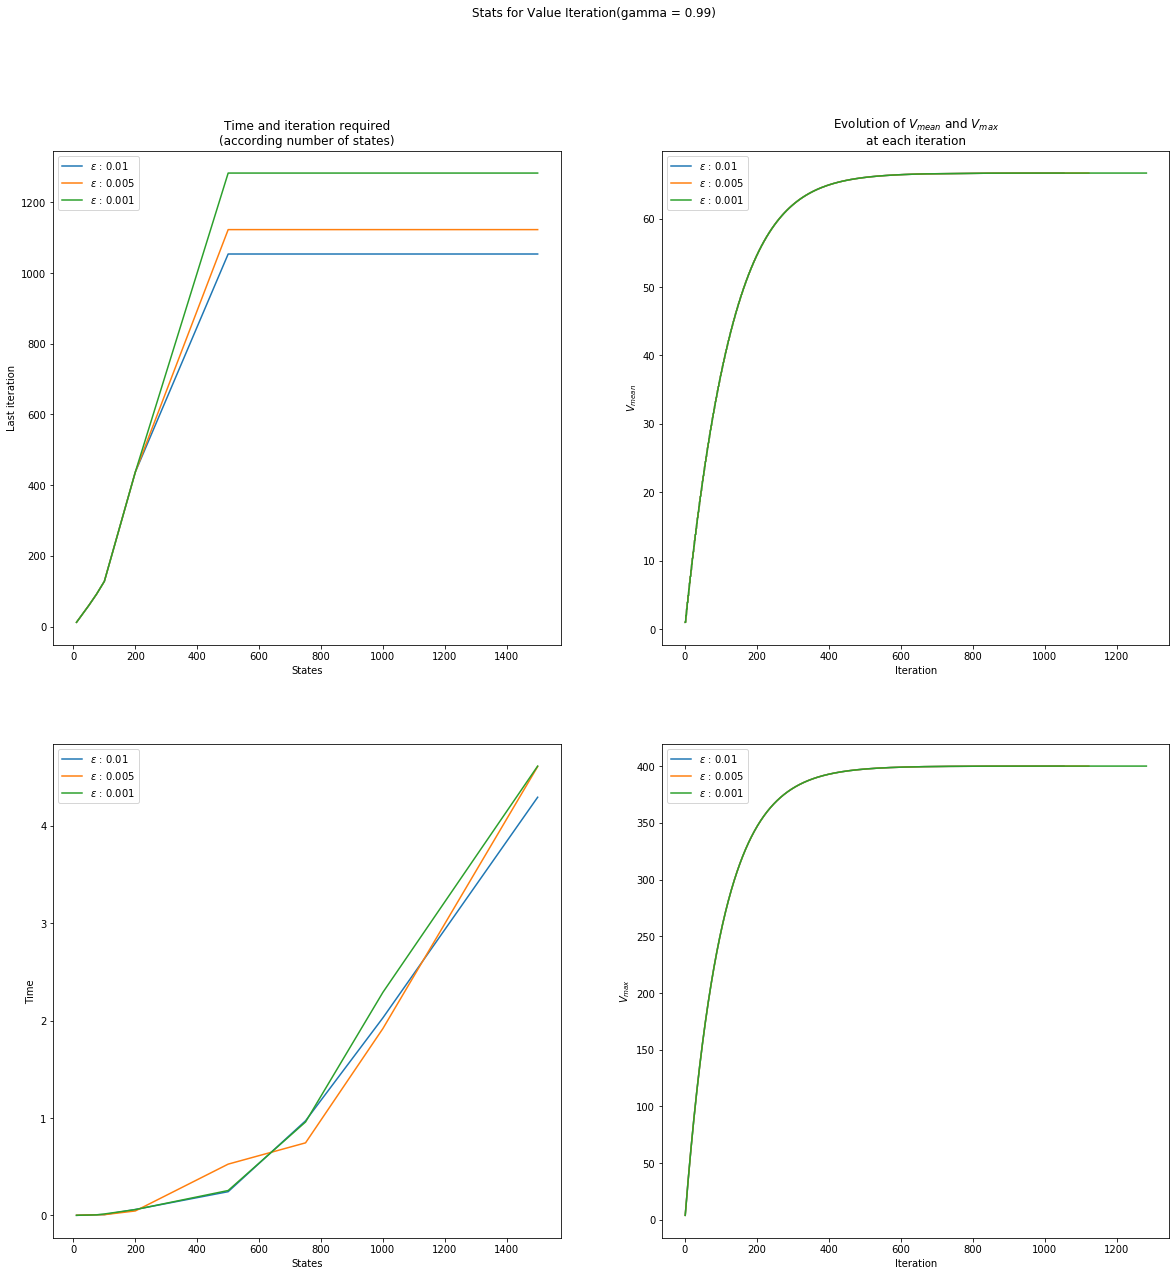

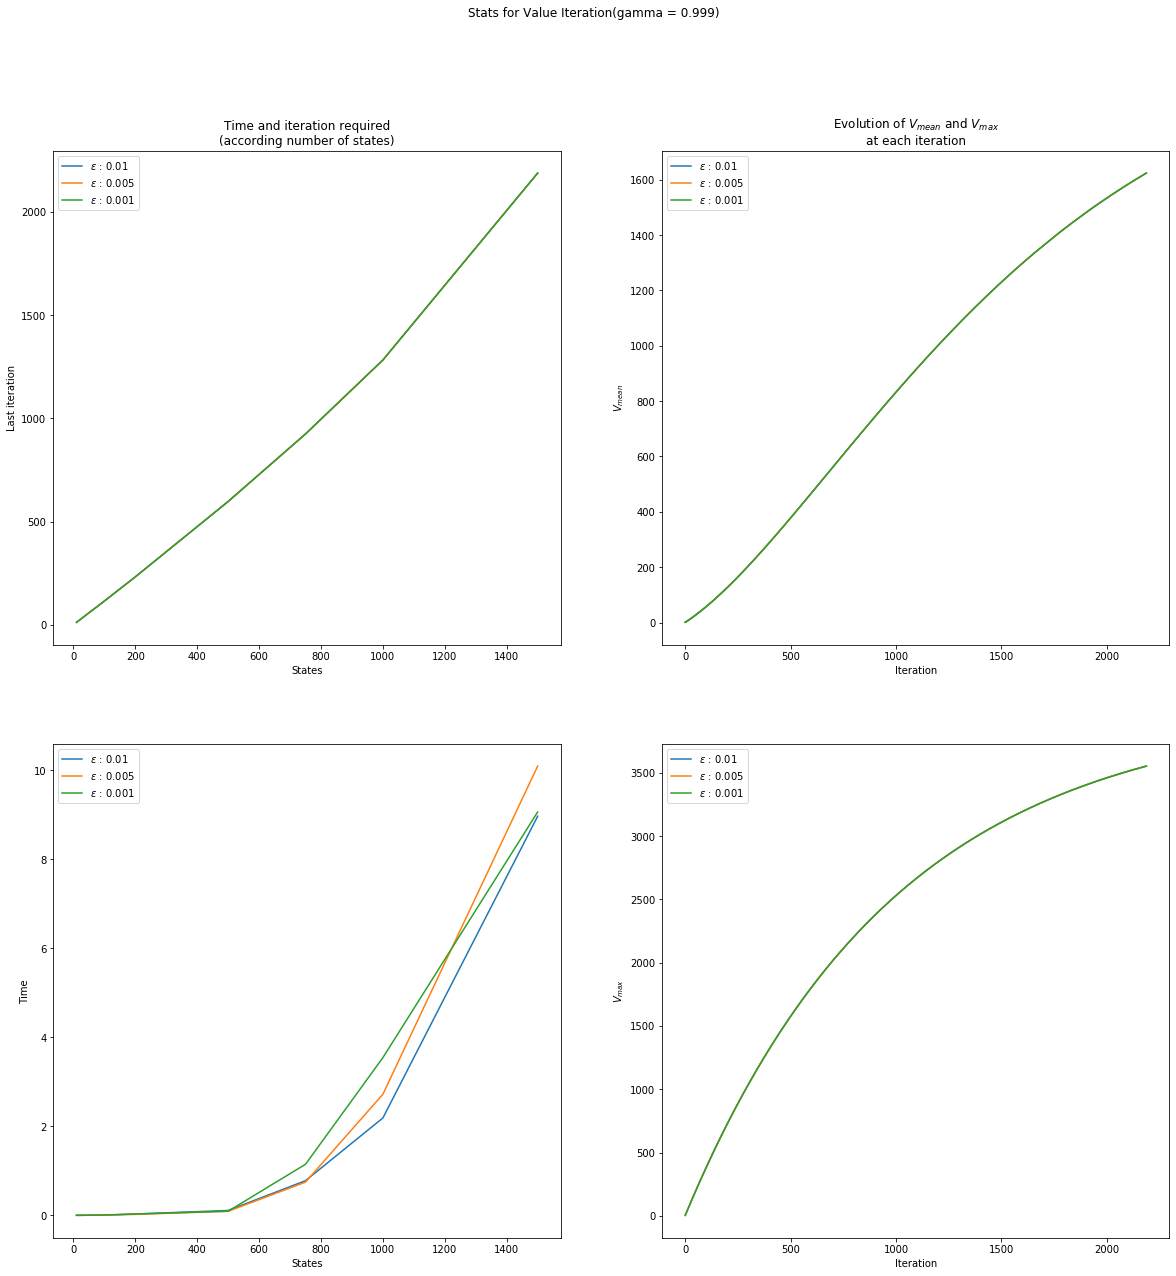

In [5]:
nb_states = [10, 20, 50, 75, 100, 200, 500, 750, 1000, 1500]
gamma = [0.9, 0.99, 0.999]
epsilon = [0.01, 0.005, 0.001]

for g in gamma:
    last_nb = list()
    last_time = list()
    last_moyv = list()
    last_maxv = list()
    itera = list()
    for e in epsilon:  
        nb = list()
        tim = list()
        moyv = list()
        maxv = list()
        iterat = list()
        for s in nb_states:
            P, R = hiive.mdptoolbox.example.forest(S=s, p = int(2/s))
            
            fm_vi = hiive.mdptoolbox.mdp.ValueIteration(P, R, epsilon = e,
                                                         gamma = g, max_iter = 1000000)
            fm_vi.run()
            stat = fm_vi.run_stats
            nb.append(stat[-1]['Iteration'])
            tim.append(stat[-1]['Time'])
    
        for k in range(len(stat)):
            moyv.append(stat[k]['Mean V'])
            maxv.append(stat[k]['Max V'])
            iterat.append(stat[k]['Iteration'])
            
        last_nb.append(nb)
        last_time.append(tim)
        last_moyv.append(moyv)
        last_maxv.append(maxv)
        itera.append(iterat)
        
    
    fig, ax = plt.subplots(2, 2, figsize = (20, 20))
    title = "Stats for Value Iteration(gamma = {})".format(g)
    fig.suptitle(title)

    for k in range(len(epsilon)):
        ax[0, 0].plot(nb_states, last_nb[k], label = r"$\epsilon$ : {}".format(epsilon[k]))
    ax[0, 0].set_title("Time and iteration required\n(according number of states)")
    ax[0, 0].set_xlabel("States")
    ax[0, 0].set_ylabel("Last iteration")
    ax[0, 0].legend()
    for k in range(len(epsilon)):
        ax[1, 0].plot(nb_states, last_time[k], label = r"$\epsilon$ : {}".format(epsilon[k]))
    ax[1, 0].set_xlabel("States")
    ax[1, 0].set_ylabel("Time")
    ax[1, 0].legend()

    for k in range(len(epsilon)):
        ax[0, 1].plot(itera[k], last_moyv[k], label = r"$\epsilon$ : {}".format(epsilon[k]))
    ax[0, 1].set_title(r"Evolution of $V_{mean}$ and $V_{max}$"+"\nat each iteration")
    ax[0, 1].set_xlabel("Iteration")
    ax[0, 1].set_ylabel(r"$V_{mean}$")
    ax[0, 1].legend()
    for k in range(len(epsilon)):
        ax[1, 1].plot(itera[k], last_maxv[k], label = r"$\epsilon$ : {}".format(epsilon[k]))
    ax[1, 1].set_xlabel("Iteration")
    ax[1, 1].set_ylabel(r"$V_{max}$")
    ax[1, 1].legend()
    
    filename = "VI_FM_" + str(g)+".png"
    plt.savefig(filename)

## Comparaison des réponses

In [6]:
s = 1000
g = 0.999
e = 0.001 

P, R = hiive.mdptoolbox.example.forest(S=s, p = 0.01, r1 = 6)
            
fm_vi = hiive.mdptoolbox.mdp.ValueIteration(P, R, epsilon = e,
                                                         gamma = g, max_iter = 1000000)
fm_vi.run()
fm_pi = hiive.mdptoolbox.mdp.PolicyIteration(P, R, gamma = g, max_iter = 100000)
fm_pi.run()
print("PI_stat : \n", fm_pi.run_stats[-1])
print("PI_poli : \n", fm_pi.policy)
print("VI_stat : \n", fm_vi.run_stats[-1])
print("VI_poli : \n", fm_vi.policy)

PI_stat : 
 {'State': None, 'Action': None, 'Reward': 997.9436594623977, 'Error': 2.259626159722359, 'Time': 10.010803937911987, 'Max V': 997.9436594623977, 'Mean V': 532.9839977079071, 'Iteration': 220}
PI_poli : 
 (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

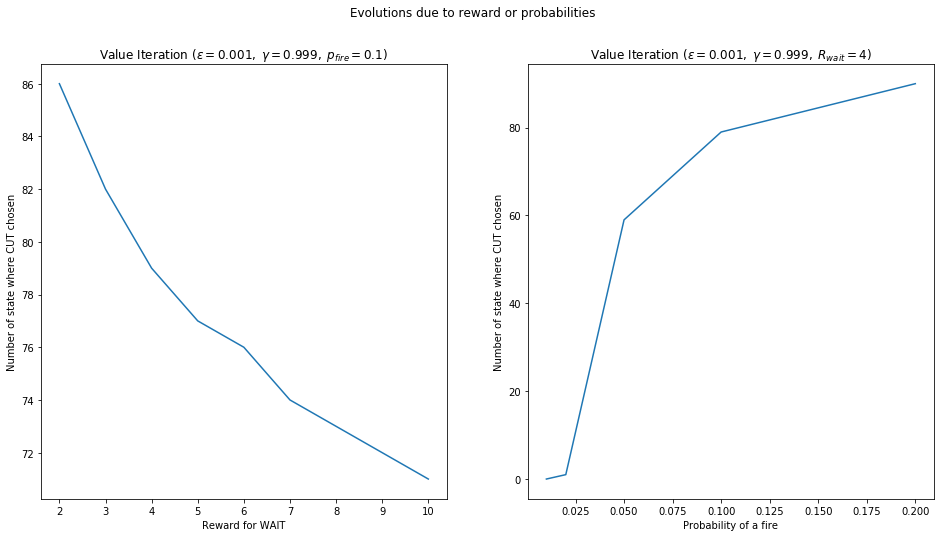

In [7]:
s = 100
g = 0.999
e = 0.001
P1 = [20/100, 10/100, 5/100, 2/100, 1/100]
R1 = [2, 3, 4, 5, 6, 7, 8, 9, 10]
yP = list()
yR = list()

for p in P1:
    P, R = hiive.mdptoolbox.example.forest(S=s, p = p, r1 = 4)

    fm_vi = hiive.mdptoolbox.mdp.ValueIteration(P, R, epsilon = e,
                                                             gamma = g, max_iter = 1000000)
    fm_vi.run()
    somme = sum(np.asarray(fm_vi.policy))
    yP.append(somme)

for r in R1:
    P, R = hiive.mdptoolbox.example.forest(S=s, p = 0.1, r1 = r)

    fm_vi = hiive.mdptoolbox.mdp.ValueIteration(P, R, epsilon = e,
                                                             gamma = g, max_iter = 1000000)
    fm_vi.run()
    somme = sum(np.asarray(fm_vi.policy))
    yR.append(somme)

fig, ax = plt.subplots(1, 2, figsize = (16, 8))
title = "Evolutions due to reward or probabilities"
fig.suptitle(title)


ax[0].plot(R1, yR)
ax[0].set_title(r"Value Iteration ($\epsilon = 0.001, \; \gamma = 0.999, \; p_{fire} = 0.1$)")
ax[0].set_xlabel("Reward for WAIT")
ax[0].set_ylabel("Number of state where CUT chosen")
ax[1].plot(P1, yP)
ax[1].set_title(r"Value Iteration ($\epsilon = 0.001, \; \gamma = 0.999, \; R_{wait} = 4$)")
ax[1].set_xlabel("Probability of a fire")
ax[1].set_ylabel("Number of state where CUT chosen")
plt.savefig("Influence_rew_pb.png")

# Grid world

In [8]:
perr = 0.1
pcor = 0.8
stepcost = -1
gold = 10
trap = -10

In [9]:
walls = [4, 6, 7, 9, 14, 16, 17, 18, 19, 26, 28, 31, 32, 33]
trap_place = 27
gold_place = 24

#Action 0: Up
Up = np.zeros((40,40))

for j in range(8):
    for i in range(5): 
        s = 5*j+i
        if s in walls: 
            field_pb = np.zeros(40)
            field_pb[s] = 1
            
        else:
            field_pb = np.zeros((8,5))

            if j>0:
                field_pb[j-1, i] = pcor
            if i>0:
                field_pb[j, i-1] = perr
            if i<4:
                field_pb[j, i+1] = perr
        
        field_lg = np.ravel(field_pb)
        for w in walls:
            field_lg[w]=0
        p_stay = 1-sum(field_lg)
        field_lg[s] = p_stay
        
        Up[s]=field_lg    

In [10]:
#Action 1: Down
Down = np.zeros((40,40))

for j in range(8):
    for i in range(5): 
        s = 5*j+i
        if s in walls: 
            field_pb = np.zeros(40)
            field_pb[s] = 1
            
        else:
            field_pb = np.zeros((8,5))

            if j<7:
                field_pb[j+1, i] = pcor
            if i>0:
                field_pb[j, i-1] = perr
            if i<4:
                field_pb[j, i+1] = perr
        
        field_lg = np.ravel(field_pb)
        for w in walls:
            field_lg[w]=0
        p_stay = 1-sum(field_lg)
        field_lg[s] = p_stay
        
        Down[s]=field_lg

In [11]:
#Action 2: Left
Left = np.zeros((40,40))

for j in range(8):
    for i in range(5): 
        s = 5*j+i
        if s in walls: 
            field_pb = np.zeros(40)
            field_pb[s] = 1
            
        else:
            field_pb = np.zeros((8,5))

            if i>0:
                field_pb[j, i-1] = pcor
            if j>0:
                field_pb[j-1, i] = perr
            if j<7:
                field_pb[j+1, i] = perr
        
        field_lg = np.ravel(field_pb)
        for w in walls:
            field_lg[w]=0
        p_stay = 1-sum(field_lg)
        field_lg[s] = p_stay
        
        Left[s]=field_lg

In [12]:
#Action 3:Right
Right = np.zeros((40,40))

for j in range(8):
    for i in range(5): 
        s = 5*j+i
        if s in walls: 
            field_pb = np.zeros(40)
            field_pb[s] = 1
            
        else:
            field_pb = np.zeros((8,5))

            if i<4:
                field_pb[j, i+1] = pcor
            if j>0:
                field_pb[j-1, i] = perr
            if j<7:
                field_pb[j+1, i] = perr
        
        field_lg = np.ravel(field_pb)
        for w in walls:
            field_lg[w]=0
        p_stay = 1-sum(field_lg)
        field_lg[s] = p_stay
        
        Right[s]=field_lg

In [13]:
P = np.array([Up, Down, Left, Right])

In [14]:
R = stepcost*np.ones((40,4))
for w in walls: 
    R[w] = np.zeros(4)
R[gold_place] = gold*np.ones(4)
R[trap_place] = trap*np.ones(4)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


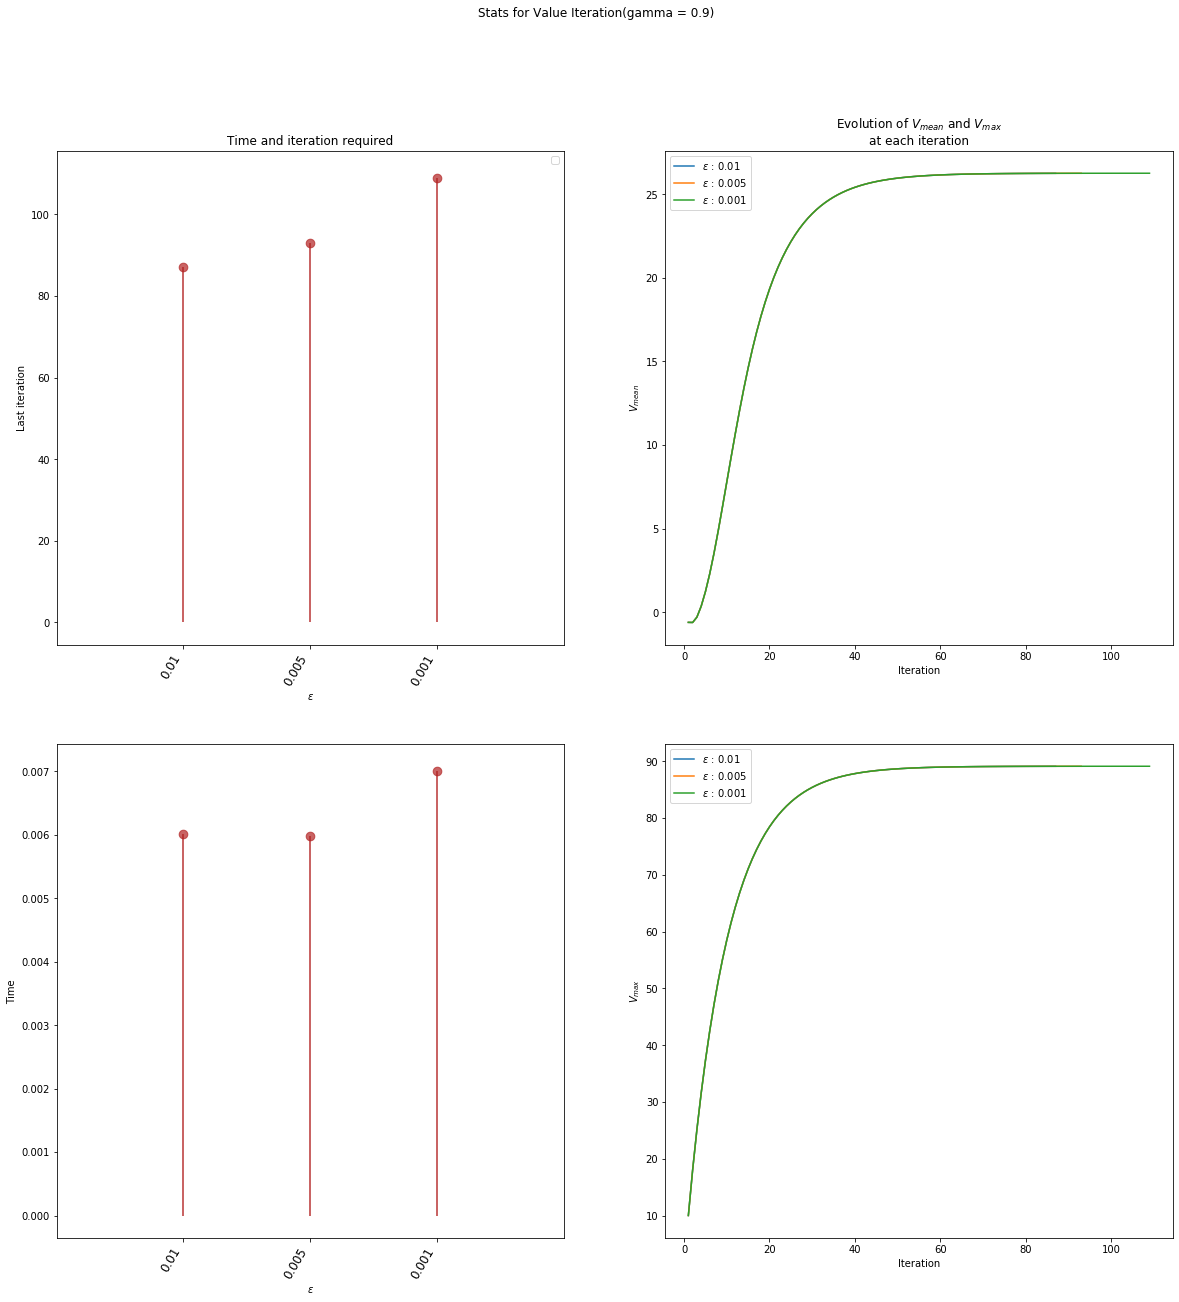

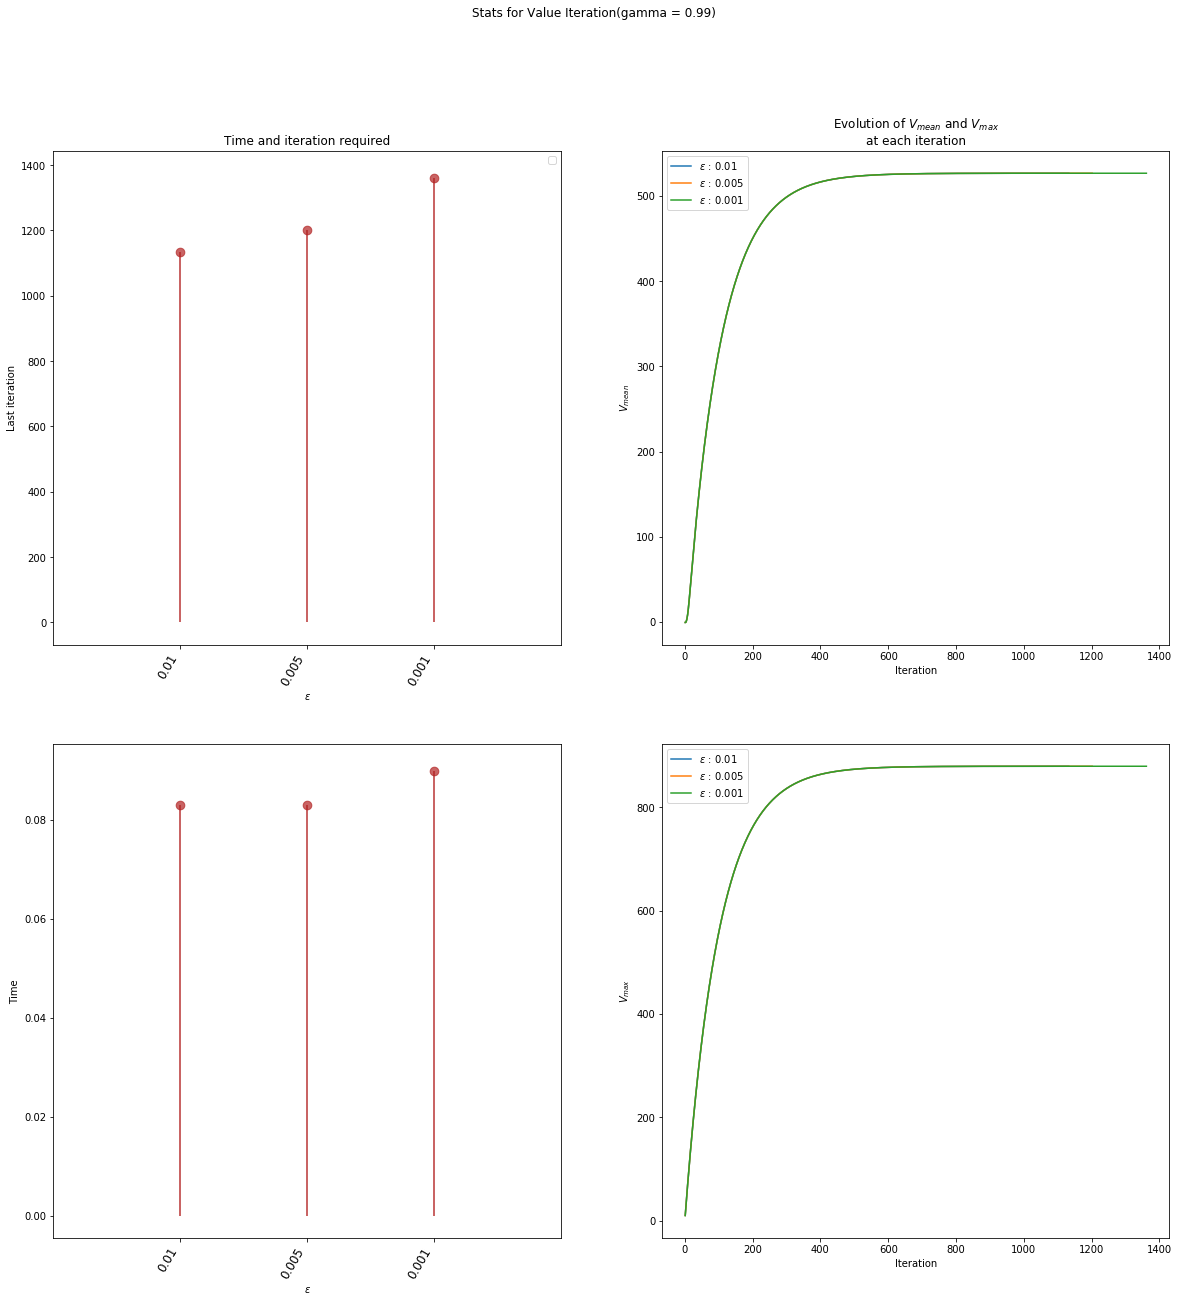

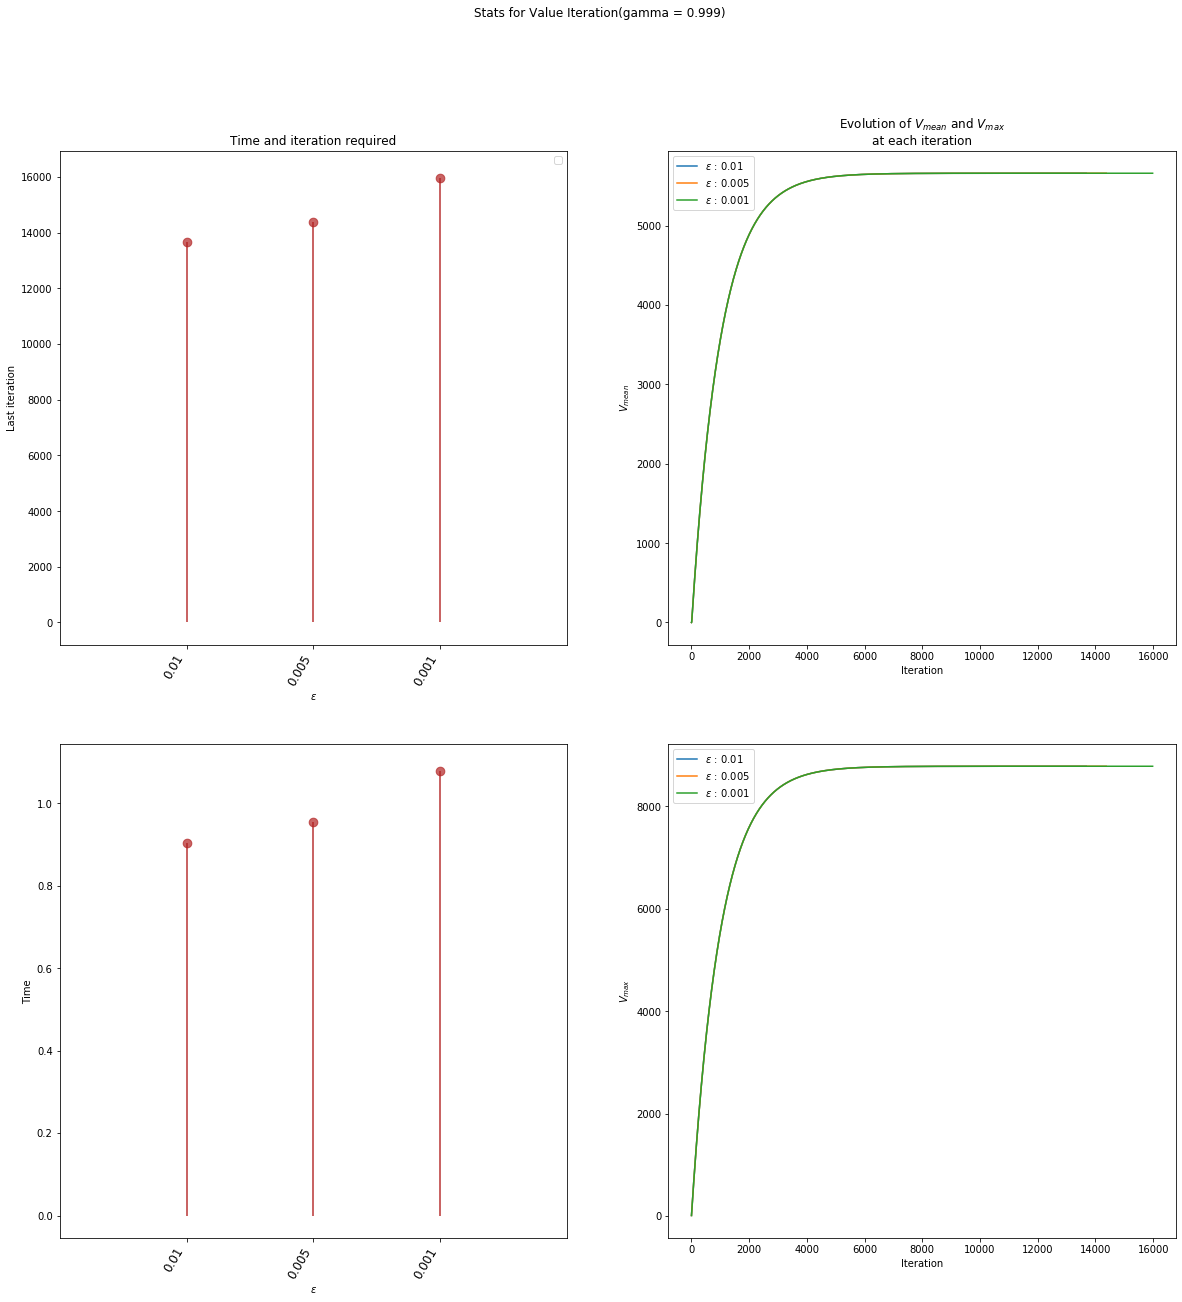

In [15]:
nb_states = [40]
gamma = [0.9, 0.99, 0.999]
epsilon = [0.01, 0.005, 0.001]

for g in gamma:
    last_nb = list()
    last_time = list()
    last_moyv = list()
    last_maxv = list()
    itera = list()
    for e in epsilon:  
        nb = list()
        tim = list()
        moyv = list()
        maxv = list()
        iterat = list()
        for s in nb_states:
            
            gw_vi = hiive.mdptoolbox.mdp.ValueIteration(P, R, epsilon = e,
                                                         gamma = g, max_iter = 1000000)
            gw_vi.run()
            stat = gw_vi.run_stats
            nb.append(stat[-1]['Iteration'])
            tim.append(stat[-1]['Time'])
    
        for k in range(len(stat)):
            moyv.append(stat[k]['Mean V'])
            maxv.append(stat[k]['Max V'])
            iterat.append(stat[k]['Iteration'])
            
        last_nb.append(nb)
        last_time.append(tim)
        last_moyv.append(moyv)
        last_maxv.append(maxv)
        itera.append(iterat)
        
    
    fig, ax = plt.subplots(2, 2, figsize = (20, 20))
    title = "Stats for Value Iteration(gamma = {})".format(g)
    fig.suptitle(title)

    
    ax[0, 0].vlines(x=[1, 2, 3], ymin=0, ymax=last_nb, color='firebrick', alpha=0.7, linewidth=2)
    ax[0, 0].scatter(x=[1, 2, 3], y=last_nb, s=75, color='firebrick', alpha=0.7)
    ax[0, 0].set_xticks([1, 2, 3])
    ax[0, 0].set_xticklabels([0.01, 0.005, 0.001], rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
    ax[0, 0].set_xlim(0, 4)
    ax[0, 0].set_title("Time and iteration required")
    ax[0, 0].set_xlabel(r"$\epsilon$")
    ax[0, 0].set_ylabel("Last iteration")
    ax[0, 0].legend()
    ax[1, 0].vlines(x=[1, 2, 3], ymin=0, ymax=last_time, color='firebrick', alpha=0.7, linewidth=2)
    ax[1, 0].scatter(x=[1, 2, 3], y=last_time, s=75, color='firebrick', alpha=0.7)
    ax[1, 0].set_xticks([1, 2, 3])
    ax[1, 0].set_xticklabels([0.01, 0.005, 0.001], rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
    ax[1, 0].set_xlim(0, 4)
    ax[1, 0].set_xlabel(r"$\epsilon$")
    ax[1, 0].set_ylabel("Time")
    

    for k in range(len(epsilon)):
        ax[0, 1].plot(itera[k], last_moyv[k], label = r"$\epsilon$ : {}".format(epsilon[k]))
    ax[0, 1].set_title(r"Evolution of $V_{mean}$ and $V_{max}$"+"\nat each iteration")
    ax[0, 1].set_xlabel("Iteration")
    ax[0, 1].set_ylabel(r"$V_{mean}$")
    ax[0, 1].legend()
    for k in range(len(epsilon)):
        ax[1, 1].plot(itera[k], last_maxv[k], label = r"$\epsilon$ : {}".format(epsilon[k]))
    ax[1, 1].set_xlabel("Iteration")
    ax[1, 1].set_ylabel(r"$V_{max}$")
    ax[1, 1].legend()
    
    filename = "VI_GW_" + str(g)+".png"
    plt.savefig(filename)

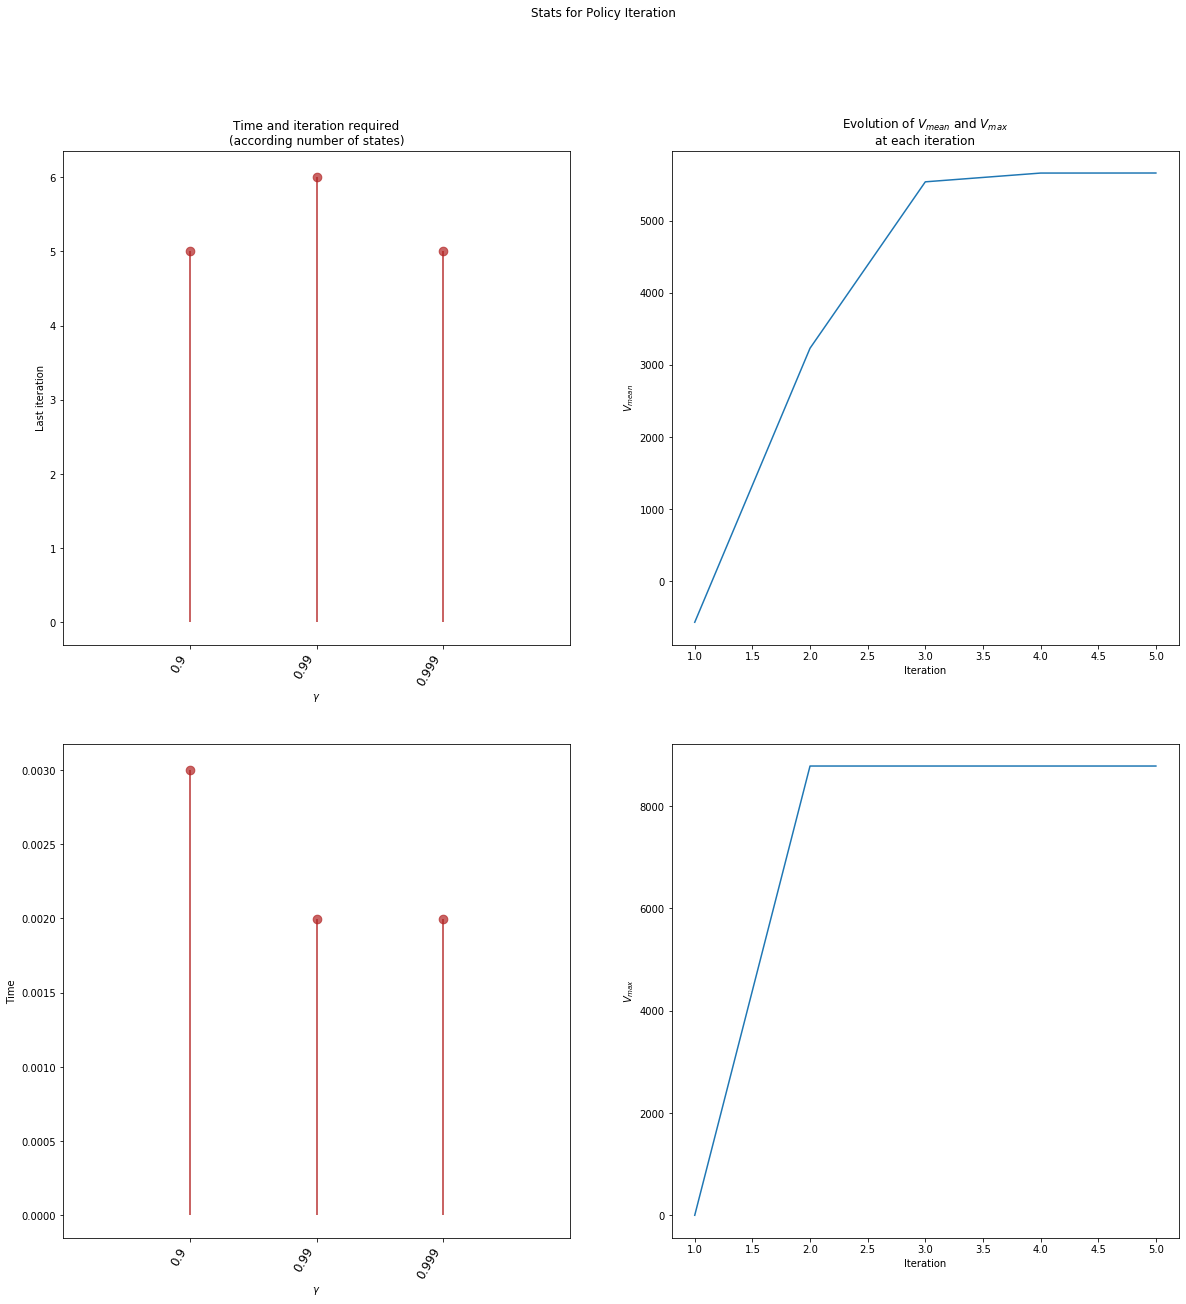

In [16]:
gamma = [0.9, 0.99, 0.999]

last_nb = list()
last_time = list()
last_moyv = list()
last_maxv = list()
itera = list()

for g in gamma:
        
    gw_pim = hiive.mdptoolbox.mdp.PolicyIteration(P, R, gamma = g,
                                              max_iter = 1000000)
    gw_pim.run()
    stat = gw_pim.run_stats
    last_nb.append(stat[-1]['Iteration'])
    last_time.append(stat[-1]['Time'])
    
for k in range(len(stat)):
    last_moyv.append(stat[k]['Mean V'])
    last_maxv.append(stat[k]['Max V'])
    itera.append(stat[k]['Iteration'])
    
fig, ax = plt.subplots(2, 2, figsize = (20, 20))
title = "Stats for Policy Iteration".format(g)
fig.suptitle(title)
    
ax[0, 0].vlines(x=[1, 2, 3], ymin=0, ymax=last_nb, color='firebrick', alpha=0.7, linewidth=2)
ax[0, 0].scatter(x=[1, 2, 3], y=last_nb, s=75, color='firebrick', alpha=0.7)
ax[0, 0].set_xticks([1, 2, 3])
ax[0, 0].set_xticklabels(gamma, rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
ax[0, 0].set_xlim(0, 4)
ax[0, 0].set_title("Time and iteration required\n(according number of states)")
ax[0, 0].set_xlabel(r"$\gamma$")
ax[0, 0].set_ylabel("Last iteration")
ax[1, 0].vlines(x=[1, 2, 3], ymin=0, ymax=last_time, color='firebrick', alpha=0.7, linewidth=2)
ax[1, 0].scatter(x=[1, 2, 3], y=last_time, s=75, color='firebrick', alpha=0.7)
ax[1, 0].set_xticks([1, 2, 3])
ax[1, 0].set_xticklabels(gamma, rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
ax[1, 0].set_xlim(0, 4)
ax[1, 0].set_xlabel(r"$\gamma$")
ax[1, 0].set_ylabel("Time")
    
ax[0, 1].plot(itera, last_moyv)
ax[0, 1].set_title(r"Evolution of $V_{mean}$ and $V_{max}$"+"\nat each iteration")
ax[0, 1].set_xlabel("Iteration")
ax[0, 1].set_ylabel(r"$V_{mean}$")
ax[1, 1].plot(itera, last_maxv)
ax[1, 1].set_xlabel("Iteration")
ax[1, 1].set_ylabel(r"$V_{max}$")
    
filename = "PI_GW.png"
plt.savefig(filename)

In [17]:
gw_pim = hiive.mdptoolbox.mdp.PolicyIteration(P, R, gamma = 0.999,
                                              max_iter = 1000000)
gw_pim.run()
pol = gw_pim.policy
print(gw_pim.V)

walls = [4, 6, 7, 9, 14, 16, 17, 18, 19, 26, 28, 31, 32, 33]

grid_policy = np.zeros((8,5))

comp = 0
for k in range(len(pol)):
    j = comp//5
    i = comp%5
    grid_policy[j, i] = pol[k]
    comp += 1

l_pol = np.ravel(grid_policy)
for w in walls:
    l_pol[w] = -5
print(grid_policy)

(8672.853940799647, 8660.765895385, 8648.692956250554, 8637.973377363487, 0.0, 8686.468117073073, 0.0, 0.0, 8648.692956250556, 0.0, 8698.588322424766, 8686.468117073073, 8674.363058191453, 8660.765895385002, 0.0, 8712.238718867533, 0.0, 0.0, 0.0, 0.0, 8724.391169716966, 8739.59693904809, 8751.783621904757, 8766.914787246047, 8779.135651594454, 8712.238718867531, 0.0, 8728.349750845144, 0.0, 8766.914787246047, 8700.101454784968, 0.0, 0.0, 0.0, 8754.709195160012, 8693.25253065252, 8704.525109493638, 8716.66790867969, 8728.825901558419, 8740.99910714095)
[[ 1.  2.  2.  1. -5.]
 [ 1. -5. -5.  1. -5.]
 [ 1.  2.  2.  2. -5.]
 [ 1. -5. -5. -5. -5.]
 [ 3.  3.  3.  3.  0.]
 [ 0. -5.  0. -5.  0.]
 [ 0. -5. -5. -5.  0.]
 [ 3.  3.  3.  3.  0.]]


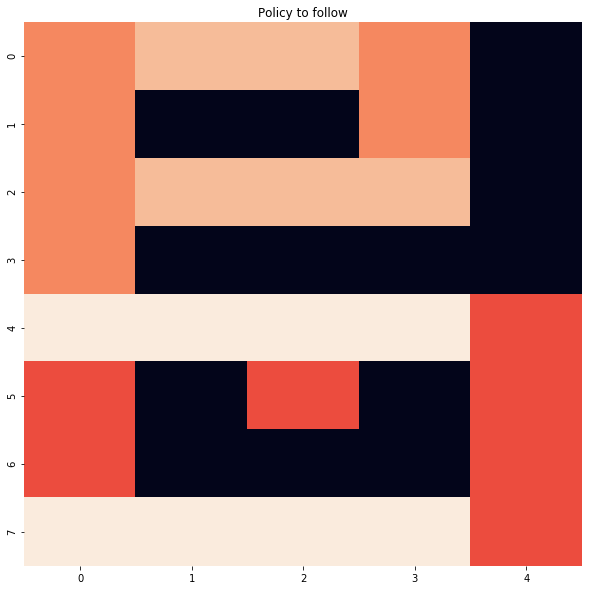

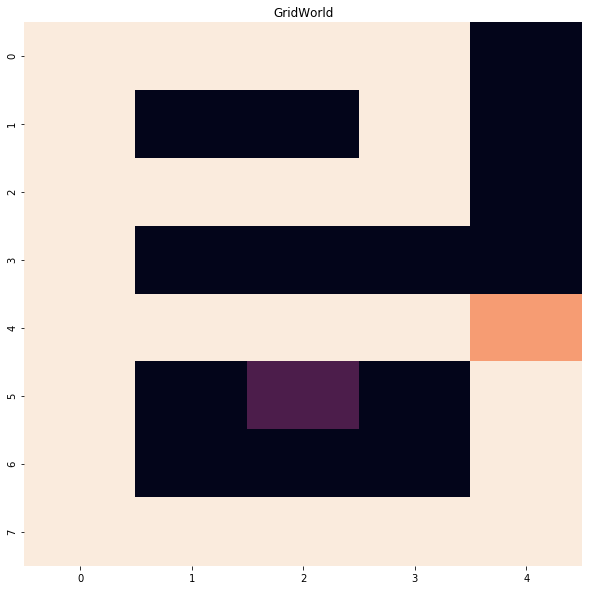

In [18]:
import seaborn as sns

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.set_title("Policy to follow")
sns.heatmap(grid_policy, annot = False, cbar = False)
plt.savefig("Policy_gw_10.png")

grid = [[ 0, 0, 0, 0, -5],
 [ 0, -5, -5,  0, -5],
 [ 0,  0,  0,  0, -5],
 [ 0, -5, -5, -5, -5],
 [ 0,  0,  0,  0,  -1],
 [ 0, -5,  -4, -5,  0],
 [ 0, -5, -5, -5,  0],
 [ 0,  0,  0,  0,  0]]

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.set_title("GridWorld")
sns.heatmap(grid, annot = False, cbar = False)
plt.savefig("gw.png")

# Reinforcement learning - QLearning

In [19]:
help(hiive.mdptoolbox.mdp.QLearning)

Help on class QLearning in module hiive.mdptoolbox.mdp:

class QLearning(MDP)
 |  QLearning(transitions, reward, gamma, alpha=0.1, alpha_decay=0.99, alpha_min=0.001, epsilon=1.0, epsilon_min=0.1, epsilon_decay=0.99, n_iter=10000, skip_check=False, iter_callback=None, run_stat_frequency=None)
 |  
 |  A discounted MDP solved using the Q learning algorithm.
 |  
 |  Parameters
 |  ----------
 |  transitions : array
 |      Transition probability matrices. See the documentation for the ``MDP``
 |      class for details.
 |  reward : array
 |      Reward matrices or vectors. See the documentation for the ``MDP`` class
 |      for details.
 |  gamma : float
 |      Discount factor. See the documentation for the ``MDP`` class for
 |      details.
 |  n_iter : int, optional
 |      Number of iterations to execute. This is ignored unless it is an
 |      integer greater than the default value. Defaut: 10,000.
 |  skip_check : bool
 |      By default we run a check on the ``transitions`` and ``

In [21]:
grid_q = hiive.mdptoolbox.mdp.QLearning(P, R, gamma= 0.9, epsilon_decay = 0.9, n_iter = 100000)
grid_q.run()

[{'State': 9,
  'Action': 0,
  'Reward': 0.0,
  'Error': 0.0,
  'Time': 0.0070149898529052734,
  'Alpha': 0.03697296376497267,
  'Epsilon': 0.1,
  'Gamma': 0.9,
  'Max V': 9.2274760703338,
  'Mean V': 0.19996522102751998,
  'Iteration': 100},
 {'State': 13,
  'Action': 3,
  'Reward': -1.0,
  'Error': 0.013533300490703223,
  'Time': 0.012007713317871094,
  'Alpha': 0.013533300490703223,
  'Epsilon': 0.1,
  'Gamma': 0.9,
  'Max V': 9.2274760703338,
  'Mean V': 0.19996522102751998,
  'Iteration': 200},
 {'State': 24,
  'Action': 0,
  'Reward': 10.0,
  'Error': 0.044965310410282996,
  'Time': 0.017009496688842773,
  'Alpha': 0.004953625663766243,
  'Epsilon': 0.1,
  'Gamma': 0.9,
  'Max V': 9.272441380744084,
  'Mean V': 0.1960208858191374,
  'Iteration': 300},
 {'State': 38,
  'Action': 2,
  'Reward': -1.0,
  'Error': 0.001813187199499512,
  'Time': 0.02200174331665039,
  'Alpha': 0.001813187199499512,
  'Epsilon': 0.1,
  'Gamma': 0.9,
  'Max V': 9.535958196782596,
  'Mean V': 0.199963806

In [23]:
grid_q.run_stats[-1]

{'State': 36,
 'Action': 3,
 'Reward': -1.0,
 'Error': 0.0006014570863682661,
 'Time': 52.40519595146179,
 'Alpha': 0.001,
 'Epsilon': 0.1,
 'Gamma': 0.9,
 'Max V': 89.21789783938756,
 'Mean V': 11.8046612623366,
 'Iteration': 1000000}

In [25]:
grid_q = hiive.mdptoolbox.mdp.QLearning(P, R, gamma= 0.9, epsilon = 0.8, epsilon_decay = 0.9, n_iter = 100000)
grid_q.run()
grid_q.run_stats[-1]

{'State': 38,
 'Action': 2,
 'Reward': -1.0,
 'Error': 0.0010126006428969987,
 'Time': 5.431918621063232,
 'Alpha': 0.001,
 'Epsilon': 0.1,
 'Gamma': 0.9,
 'Max V': 72.24351701558994,
 'Mean V': 3.753154942875189,
 'Iteration': 100000}

In [39]:
dec = [0.99, 0.95, 0.9, 0.7, 0.5]
epsilon = [1, 0.95, 0.9, 0.8, 0.6, 0.5, 0.1]
alpha = [0.1, 0.095, 0.09, 0.08, 0.05, 0.01]

temps = list()
meanv = list()
maxiv = list()
polep = list()

for eps in epsilon:
    grid_q = hiive.mdptoolbox.mdp.QLearning(P, R, gamma= 0.9, epsilon = eps, epsilon_decay = 0.99, n_iter = 300000)
    grid_q.run()
    res = grid_q.run_stats[-1]
    temps.append(res["Time"])
    meanv.append(res["Mean V"])
    maxiv.append(res["Max V"])
    polep.append(grid_q.policy)

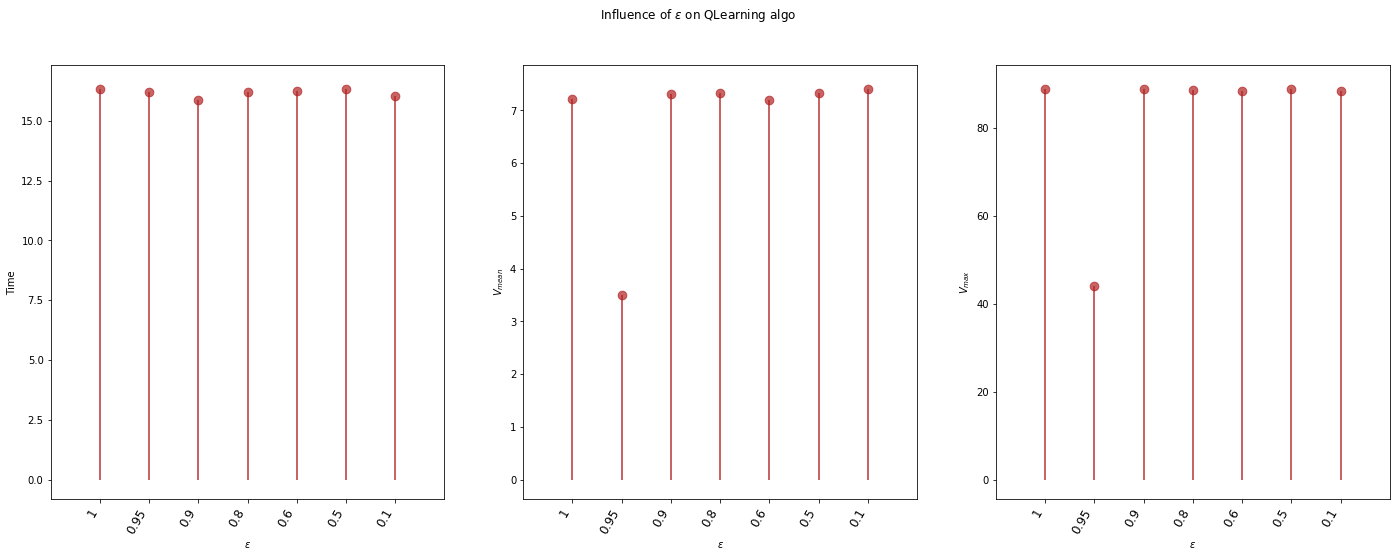

In [40]:
fig, ax = plt.subplots(1, 3, figsize = (24, 8))
title = r"Influence of $\epsilon$ on QLearning algo"
fig.suptitle(title)

index = np.asarray(range(len(epsilon)))+1
l = len(epsilon)+1

ax[0].vlines(x=index, ymin=0, ymax=temps, color='firebrick', alpha=0.7, linewidth=2)
ax[0].scatter(x=index, y=temps, s=75, color='firebrick', alpha=0.7)
ax[0].set_xticks(index)
ax[0].set_xticklabels(epsilon, rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
ax[0].set_xlim(0, l)
ax[0].set_xlabel(r"$\epsilon$")
ax[0].set_ylabel("Time")

ax[1].vlines(x=index, ymin=0, ymax=meanv, color='firebrick', alpha=0.7, linewidth=2)
ax[1].scatter(x=index, y=meanv, s=75, color='firebrick', alpha=0.7)
ax[1].set_xticks(index)
ax[1].set_xticklabels(epsilon, rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
ax[1].set_xlim(0, l)
ax[1].set_xlabel(r"$\epsilon$")
ax[1].set_ylabel(r"$V_{mean}$")

ax[2].vlines(x=index, ymin=0, ymax=maxiv, color='firebrick', alpha=0.7, linewidth=2)
ax[2].scatter(x=index, y=maxiv, s=75, color='firebrick', alpha=0.7)
ax[2].set_xticks(index)
ax[2].set_xticklabels(epsilon, rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
ax[2].set_xlim(0, l)
ax[2].set_xlabel(r"$\epsilon$")
ax[2].set_ylabel(r"$V_{max}$")

plt.savefig("eps_ql.png")

In [35]:
temps = list()
meanv = list()
maxiv = list()
polepd = list()

for d in dec:
    grid_q = hiive.mdptoolbox.mdp.QLearning(P, R, gamma= 0.9, epsilon = 1, epsilon_decay = d, n_iter = 300000)
    grid_q.run()
    res = grid_q.run_stats[-1]
    temps.append(res["Time"])
    meanv.append(res["Mean V"])
    maxiv.append(res["Max V"])
    polepd.append(grid_q.policy)

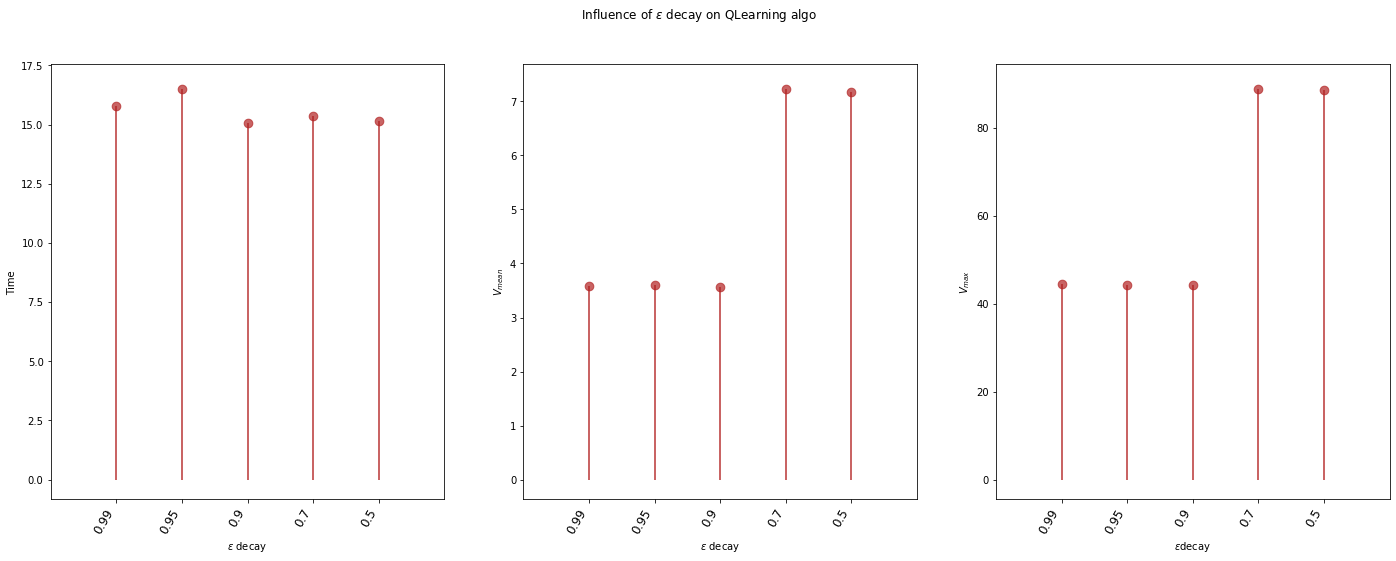

In [36]:
fig, ax = plt.subplots(1, 3, figsize = (24, 8))
title = r"Influence of $\epsilon$ decay on QLearning algo"
fig.suptitle(title)

index = np.asarray(range(len(dec)))+1
l = len(dec)+1

ax[0].vlines(x=index, ymin=0, ymax=temps, color='firebrick', alpha=0.7, linewidth=2)
ax[0].scatter(x=index, y=temps, s=75, color='firebrick', alpha=0.7)
ax[0].set_xticks(index)
ax[0].set_xticklabels(dec, rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
ax[0].set_xlim(0, l)
ax[0].set_xlabel(r"$\epsilon$ decay")
ax[0].set_ylabel("Time")

ax[1].vlines(x=index, ymin=0, ymax=meanv, color='firebrick', alpha=0.7, linewidth=2)
ax[1].scatter(x=index, y=meanv, s=75, color='firebrick', alpha=0.7)
ax[1].set_xticks(index)
ax[1].set_xticklabels(dec, rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
ax[1].set_xlim(0, l)
ax[1].set_xlabel(r"$\epsilon$ decay")
ax[1].set_ylabel(r"$V_{mean}$")

ax[2].vlines(x=index, ymin=0, ymax=maxiv, color='firebrick', alpha=0.7, linewidth=2)
ax[2].scatter(x=index, y=maxiv, s=75, color='firebrick', alpha=0.7)
ax[2].set_xticks(index)
ax[2].set_xticklabels(dec, rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
ax[2].set_xlim(0, l)
ax[2].set_xlabel(r"$\epsilon$decay")
ax[2].set_ylabel(r"$V_{max}$")

plt.savefig("epsdec_ql.png")

In [46]:
temps = list()
meanv = list()
maxiv = list()
pola = list()

for a in alpha:
    grid_q = hiive.mdptoolbox.mdp.QLearning(P, R, gamma= 0.9, alpha = a, n_iter = 300000)
    grid_q.run()
    res = grid_q.run_stats[-1]
    temps.append(res["Time"])
    meanv.append(res["Mean V"])
    maxiv.append(res["Max V"])
    pola.append(grid_q.policy)

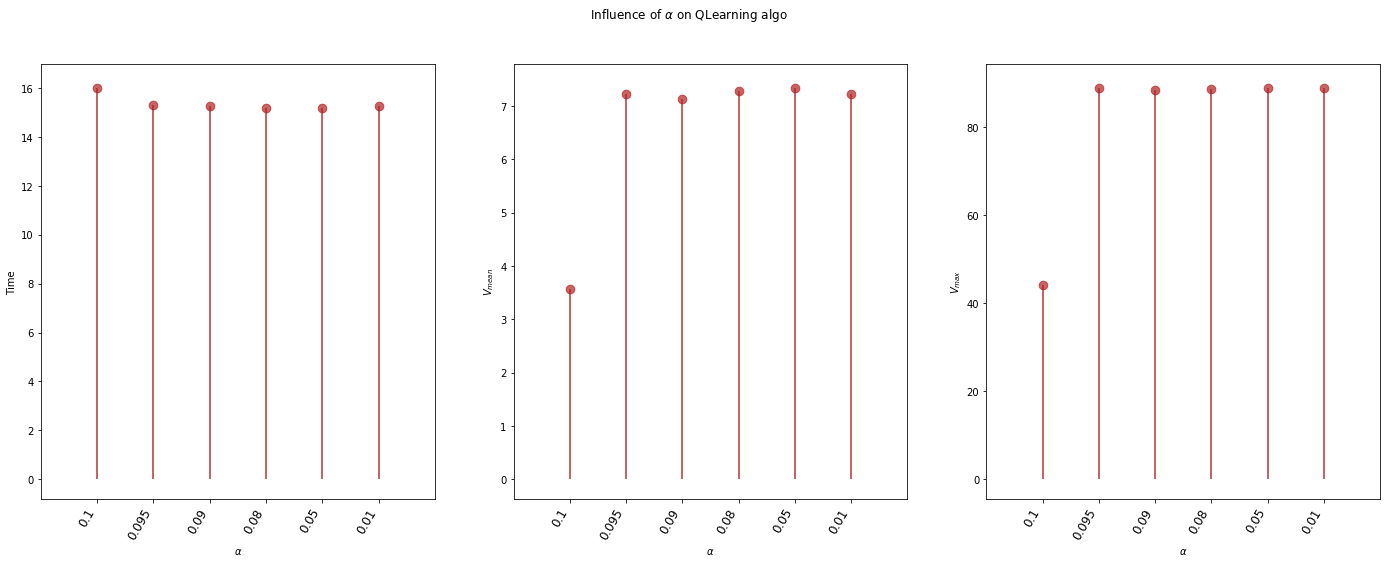

In [47]:
fig, ax = plt.subplots(1, 3, figsize = (24, 8))
title = r"Influence of $\alpha$ on QLearning algo"
fig.suptitle(title)

index = np.asarray(range(len(alpha)))+1
l = len(alpha)+1

ax[0].vlines(x=index, ymin=0, ymax=temps, color='firebrick', alpha=0.7, linewidth=2)
ax[0].scatter(x=index, y=temps, s=75, color='firebrick', alpha=0.7)
ax[0].set_xticks(index)
ax[0].set_xticklabels(alpha, rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
ax[0].set_xlim(0, l)
ax[0].set_xlabel(r"$\alpha$")
ax[0].set_ylabel("Time")

ax[1].vlines(x=index, ymin=0, ymax=meanv, color='firebrick', alpha=0.7, linewidth=2)
ax[1].scatter(x=index, y=meanv, s=75, color='firebrick', alpha=0.7)
ax[1].set_xticks(index)
ax[1].set_xticklabels(alpha, rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
ax[1].set_xlim(0, l)
ax[1].set_xlabel(r"$\alpha$")
ax[1].set_ylabel(r"$V_{mean}$")

ax[2].vlines(x=index, ymin=0, ymax=maxiv, color='firebrick', alpha=0.7, linewidth=2)
ax[2].scatter(x=index, y=maxiv, s=75, color='firebrick', alpha=0.7)
ax[2].set_xticks(index)
ax[2].set_xticklabels(alpha, rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
ax[2].set_xlim(0, l)
ax[2].set_xlabel(r"$\alpha$")
ax[2].set_ylabel(r"$V_{max}$")

plt.savefig("alp_ql.png")

In [44]:
temps = list()
meanv = list()
maxiv = list()
polapd = list()

for d in dec:
    grid_q = hiive.mdptoolbox.mdp.QLearning(P, R, gamma= 0.9, alpha_decay = d, n_iter = 300000)
    grid_q.run()
    res = grid_q.run_stats[-1]
    temps.append(res["Time"])
    meanv.append(res["Mean V"])
    maxiv.append(res["Max V"])
    polapd.append(grid_q.policy)

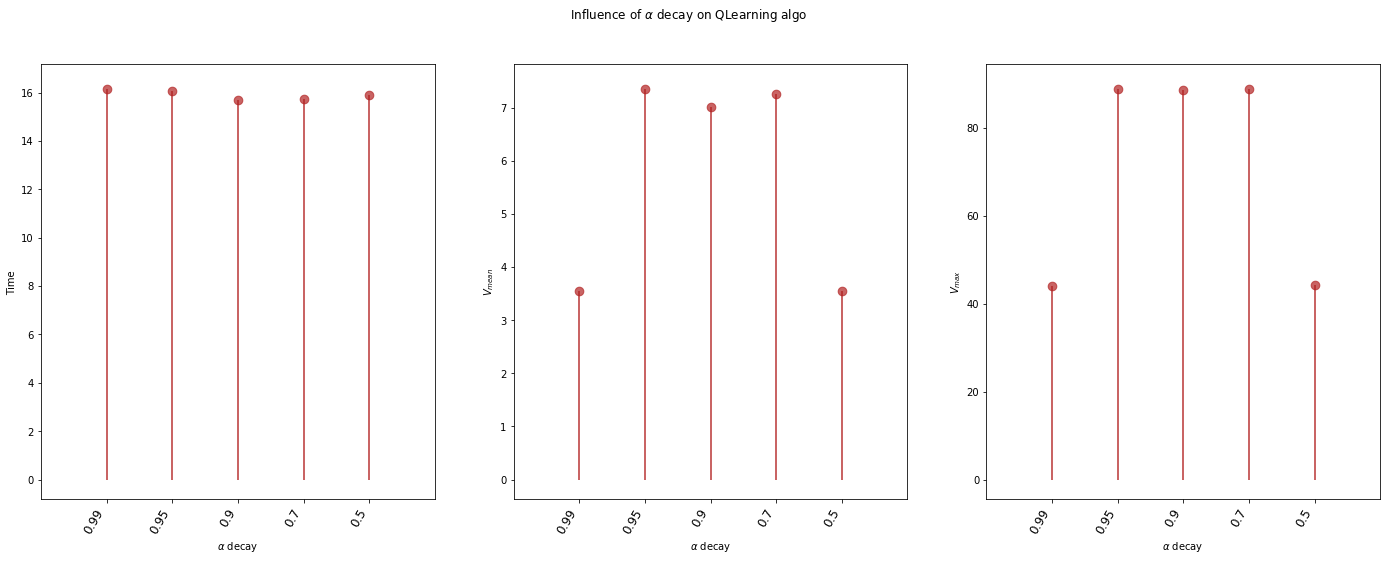

In [45]:
fig, ax = plt.subplots(1, 3, figsize = (24, 8))
title = r"Influence of $\alpha$ decay on QLearning algo"
fig.suptitle(title)

index = np.asarray(range(len(dec)))+1
l = len(dec)+1

ax[0].vlines(x=index, ymin=0, ymax=temps, color='firebrick', alpha=0.7, linewidth=2)
ax[0].scatter(x=index, y=temps, s=75, color='firebrick', alpha=0.7)
ax[0].set_xticks(index)
ax[0].set_xticklabels(dec, rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
ax[0].set_xlim(0, l)
ax[0].set_xlabel(r"$\alpha$ decay")
ax[0].set_ylabel("Time")

ax[1].vlines(x=index, ymin=0, ymax=meanv, color='firebrick', alpha=0.7, linewidth=2)
ax[1].scatter(x=index, y=meanv, s=75, color='firebrick', alpha=0.7)
ax[1].set_xticks(index)
ax[1].set_xticklabels(dec, rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
ax[1].set_xlim(0, l)
ax[1].set_xlabel(r"$\alpha$ decay")
ax[1].set_ylabel(r"$V_{mean}$")

ax[2].vlines(x=index, ymin=0, ymax=maxiv, color='firebrick', alpha=0.7, linewidth=2)
ax[2].scatter(x=index, y=maxiv, s=75, color='firebrick', alpha=0.7)
ax[2].set_xticks(index)
ax[2].set_xticklabels(dec, rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
ax[2].set_xlim(0, l)
ax[2].set_xlabel(r"$\alpha$ decay")
ax[2].set_ylabel(r"$V_{max}$")

plt.savefig("aldec_ql.png")

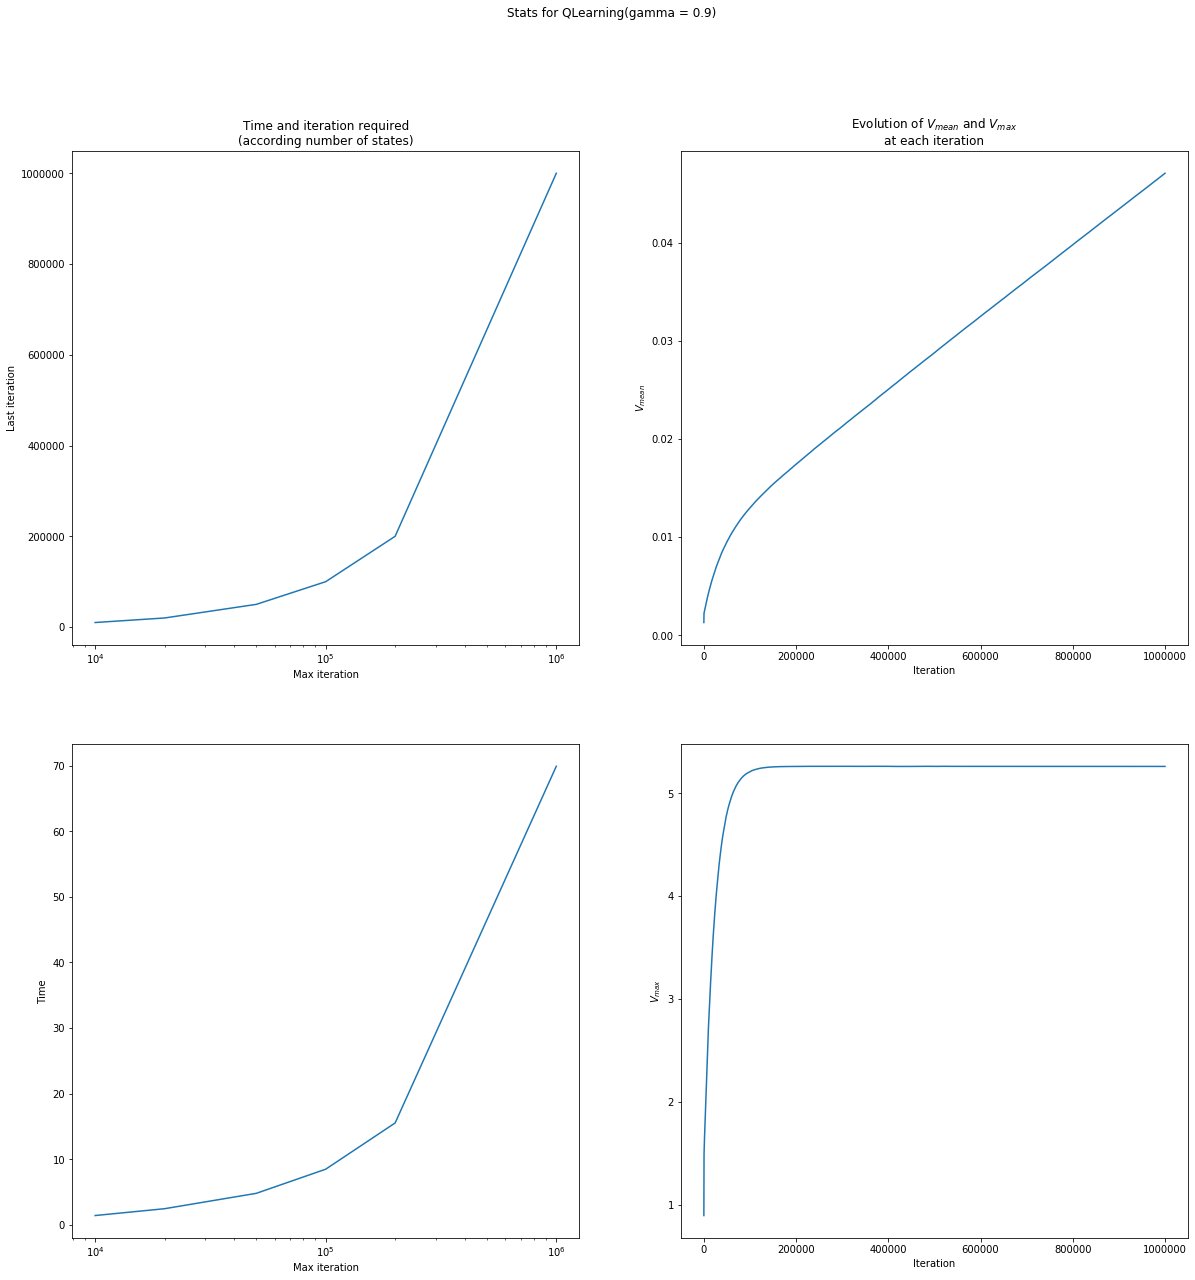

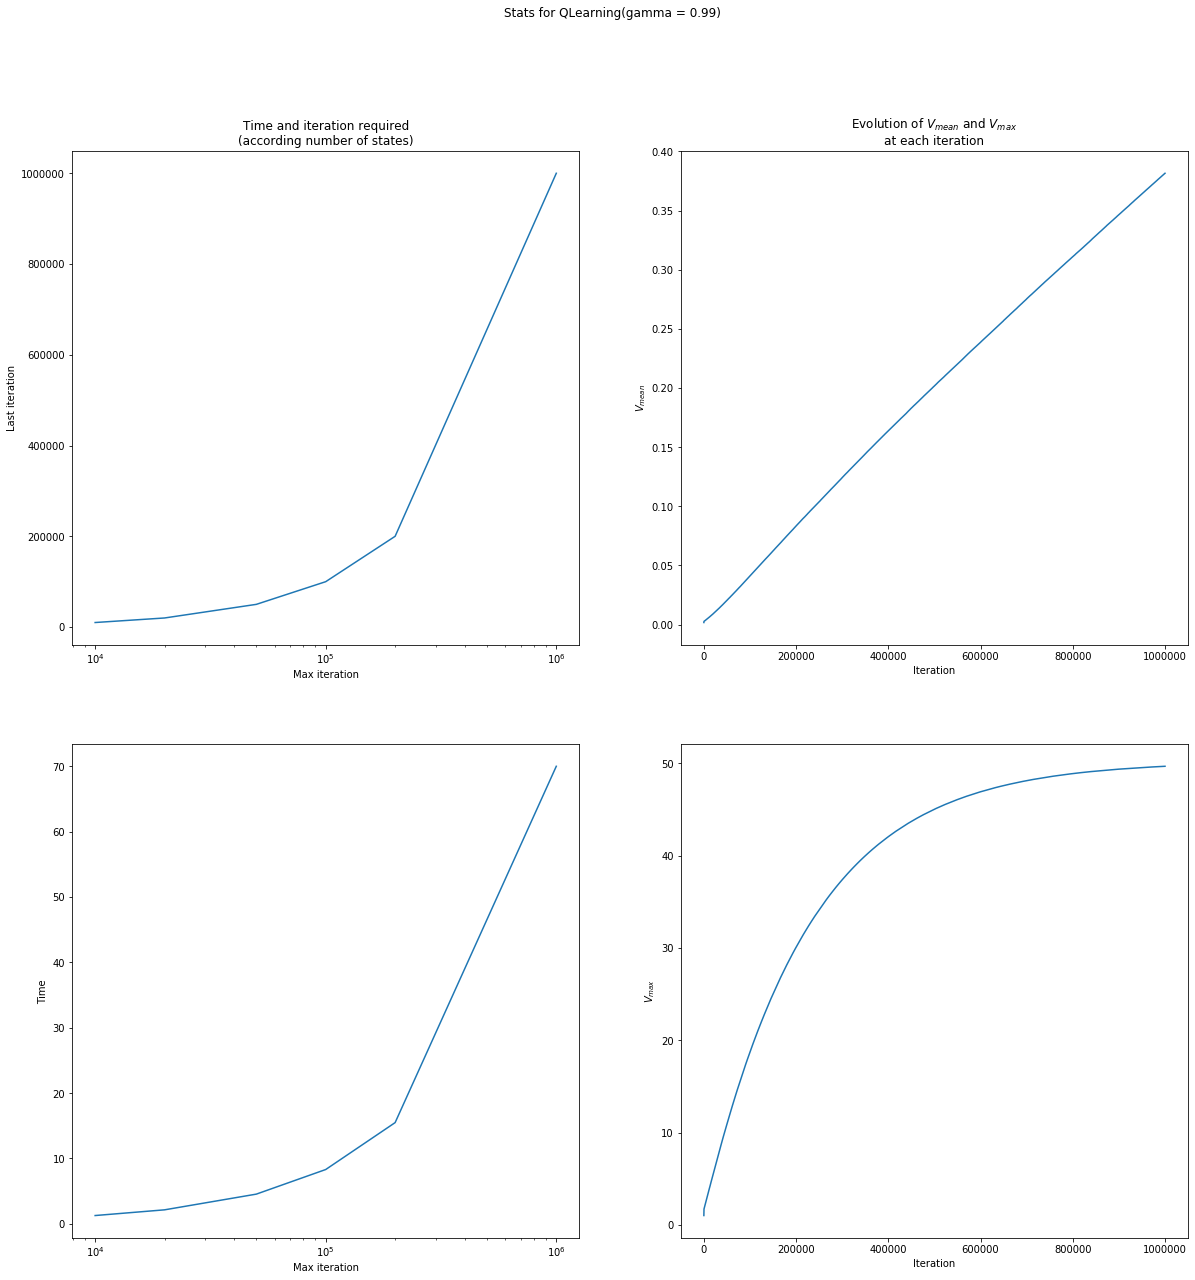

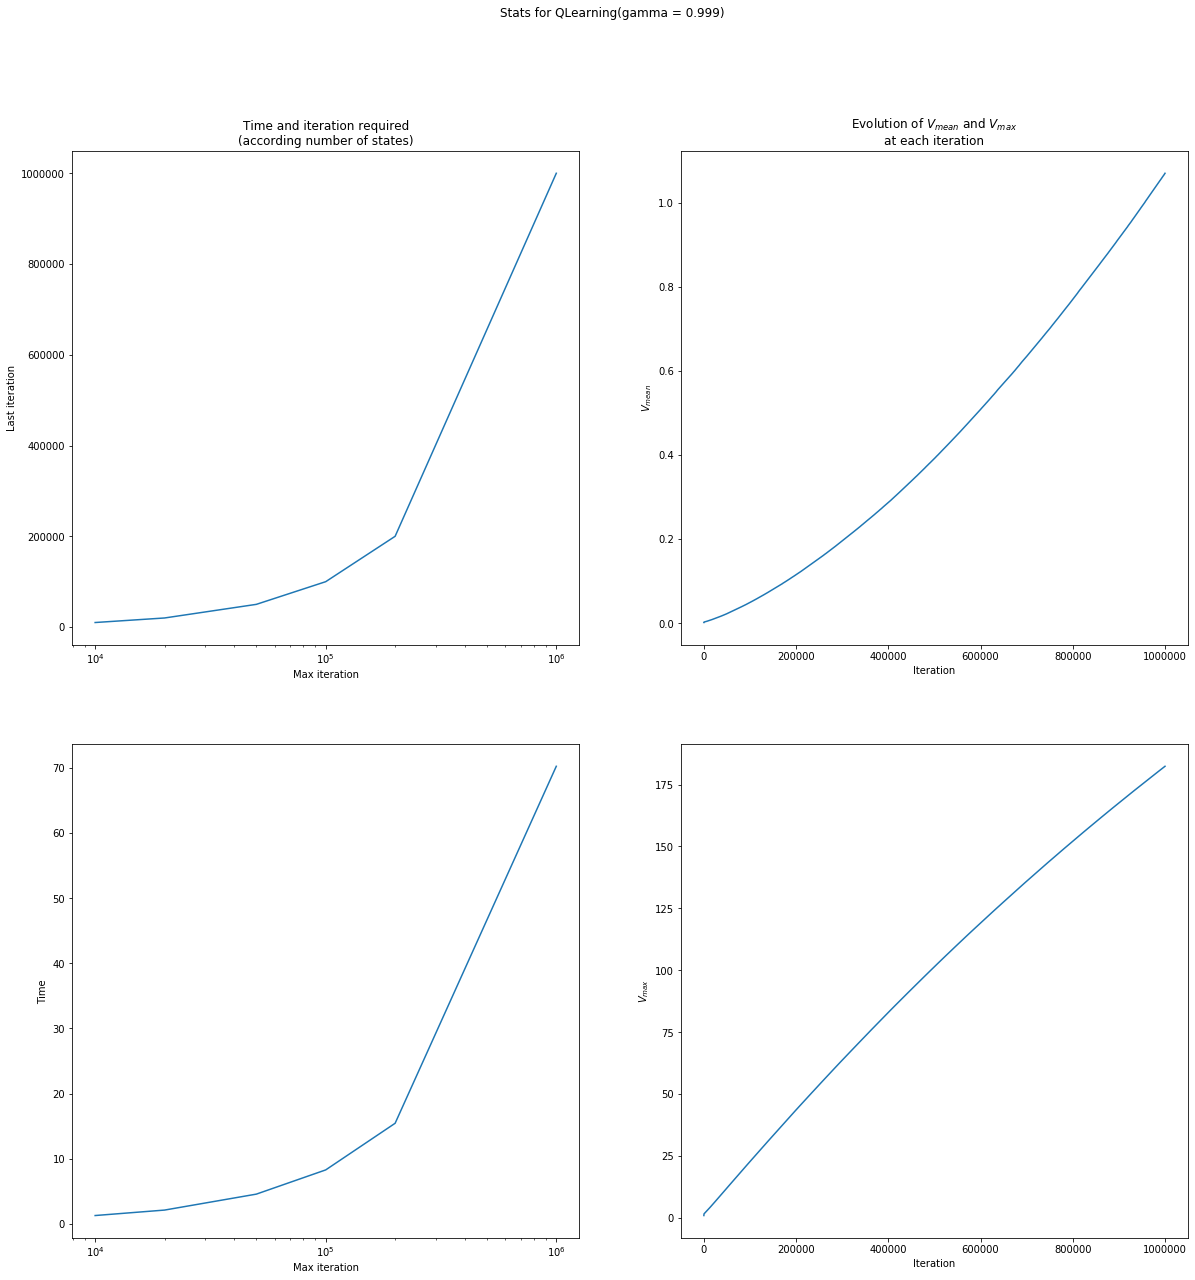

In [48]:
nb_states = [10000, 20000, 50000, 100000, 200000, 1000000]
gamma = [0.9, 0.99, 0.999]

for g in gamma:
    last_nb = list()
    last_time = list()
    last_moyv = list()
    last_maxv = list()
    itera = list()
    for s in nb_states:
        P, R = hiive.mdptoolbox.example.forest(S=1500, p = 0.001)
        fm_q = hiive.mdptoolbox.mdp.QLearning(P, R, gamma = g, n_iter = s)
        
        fm_q.run()
        stat = fm_q.run_stats
        last_nb.append(stat[-1]['Iteration'])
        last_time.append(stat[-1]['Time'])
    
    for k in range(len(stat)):
        last_moyv.append(stat[k]['Mean V'])
        last_maxv.append(stat[k]['Max V'])
        itera.append(stat[k]['Iteration'])
    
    fig, ax = plt.subplots(2, 2, figsize = (20, 20))
    title = "Stats for QLearning(gamma = {})".format(g)
    fig.suptitle(title)
    
    ax[0, 0].plot(nb_states, last_nb)
    ax[0, 0].set_title("Time and iteration required\n(according number of states)")
    ax[0, 0].set_xlabel("Max iteration")
    ax[0, 0].set_ylabel("Last iteration")
    ax[0, 0].set_xscale("log")
    ax[1, 0].plot(nb_states, last_time)
    ax[1, 0].set_xlabel("Max iteration")
    ax[1, 0].set_ylabel("Time")
    ax[1, 0].set_xscale("log")
    
    ax[0, 1].plot(itera, last_moyv)
    ax[0, 1].set_title(r"Evolution of $V_{mean}$ and $V_{max}$"+"\nat each iteration")
    ax[0, 1].set_xlabel("Iteration")
    ax[0, 1].set_ylabel(r"$V_{mean}$")
    ax[1, 1].plot(itera, last_maxv)
    ax[1, 1].set_xlabel("Iteration")
    ax[1, 1].set_ylabel(r"$V_{max}$")
    
    filename = "Q_FM_" + str(g)+".png"
    plt.savefig(filename)

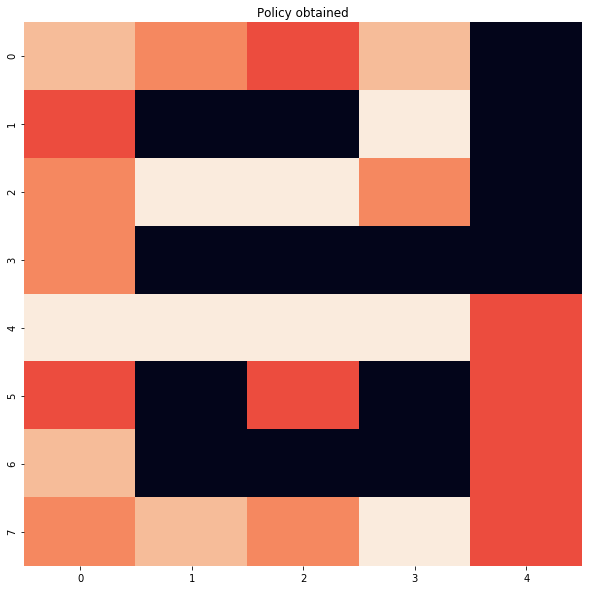

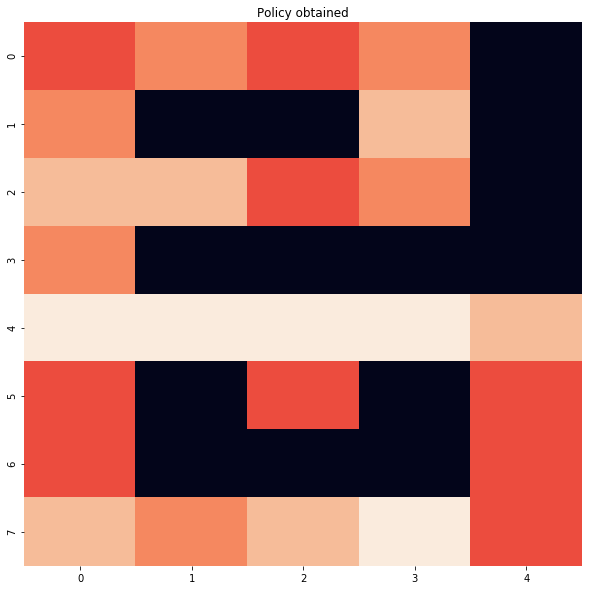

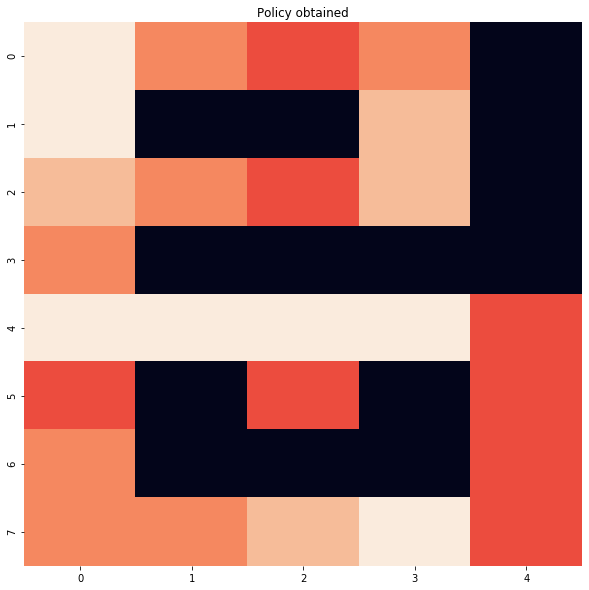

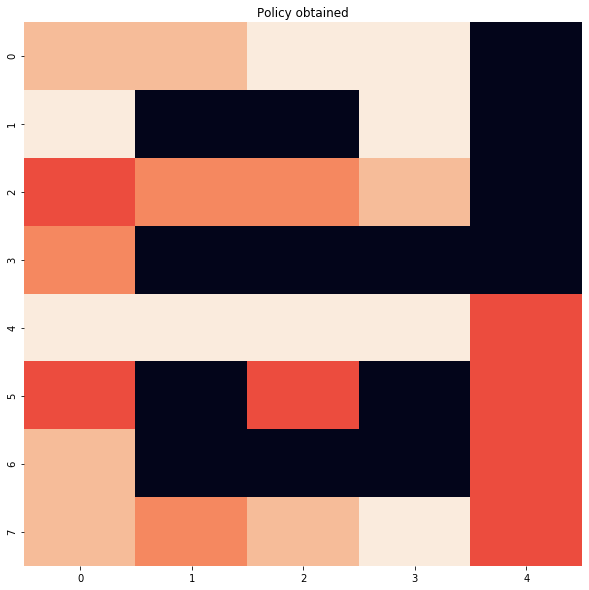

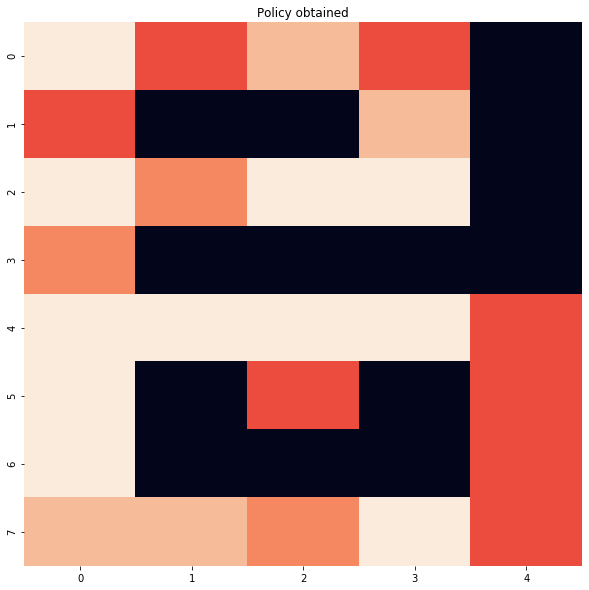

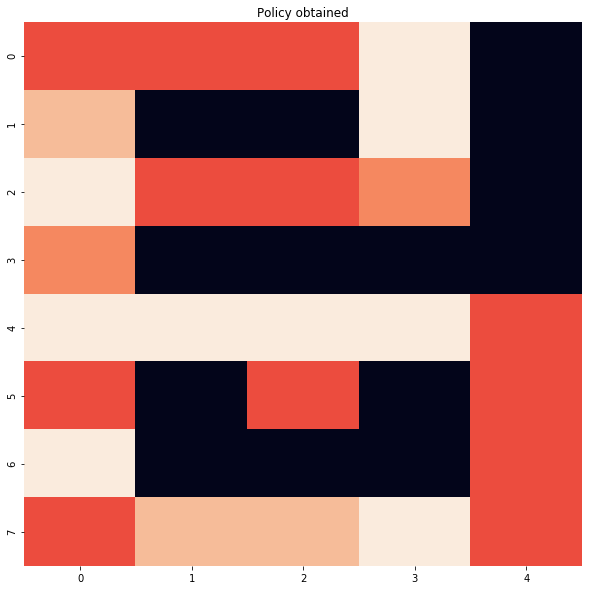

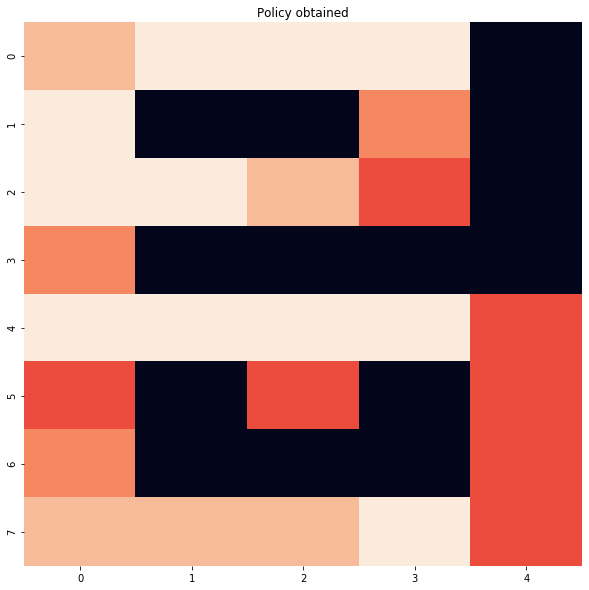

In [57]:
walls = [4, 6, 7, 9, 14, 16, 17, 18, 19, 26, 28, 31, 32, 33]

for l in range(len(polep)):
    grid_policy = np.zeros((8,5))
    pol = polep[l]
    comp = 0
    for k in range(len(pol)):
        j = comp//5
        i = comp%5
        grid_policy[j, i] = pol[k]
        comp += 1

    l_pol = np.ravel(grid_policy)
    for w in walls:
        l_pol[w] = -5

    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    ax.set_title("Policy obtained")
    sns.heatmap(grid_policy, annot = False, cbar = False)
    title = "Policy_ql_eps"+str(l)+".png"
    plt.savefig(title)